# INTRODUCTION

The US Accidents dataset ( https://www.kaggle.com/sobhanmoosavi/us-accidents ) is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to December 2020.Currently, there are about 4.2 million accident records in this dataset.This project is part of a course work contributed by Akash Sighal, Naren Janardhan Sulegai and Swetha Singi Reddy. 

### DATA EXPLORATION

In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./US_Accidents_Dec20.csv') # loading the dataset from kaggle
print("The shape of data is:",(df.shape)) # we see that there are around 4.2 million rows and 49 columns

The shape of data is: (4232541, 49)


In [3]:
df.head(5) # looking at a sample data of first 5 rows

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  

[5 rows x 49 columns]

In [4]:
df.columns # 49 columns in the dataset

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info() # information about the columns types , we can see that the start and end times are objects here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [6]:
df.nunique() # unique values in each columns

ID                       4232541
Source                         3
TMC                           21
Severity                       4
Start_Time               3657563
End_Time                 3775982
Start_Lat                1371599
Start_Lng                1371288
End_Lat                   587824
End_Lng                   599916
Distance(mi)               14619
Description              2166721
Number                     43868
Street                    210786
Side                           3
City                       12250
County                      1752
State                         49
Zipcode                   494306
Country                        1
Timezone                       4
Airport_Code                2022
Weather_Timestamp         616787
Temperature(F)               840
Wind_Chill(F)                984
Humidity(%)                  100
Pressure(in)                1041
Visibility(mi)                87
Wind_Direction                24
Wind_Speed(mph)              162
Precipitat

In [7]:
df.describe()

TMC      Severity     Start_Lat     Start_Lng       End_Lat  \
count  2.716477e+06  4.232541e+06  4.232541e+06  4.232541e+06  1.516064e+06   
mean   2.083517e+02  2.305035e+00  3.639782e+01 -9.546420e+01  3.690061e+01   
std    2.124413e+01  5.332261e-01  4.964404e+00  1.735319e+01  5.165629e+00   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02  2.457011e+01   
25%    2.010000e+02  2.000000e+00  3.352058e+01 -1.173570e+02  3.385420e+01   
50%    2.010000e+02  2.000000e+00  3.582542e+01 -9.002078e+01  3.735134e+01   
75%    2.010000e+02  3.000000e+00  4.018313e+01 -8.084682e+01  4.072593e+01   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01   

            End_Lng  Distance(mi)        Number  Temperature(F)  \
count  1.516064e+06  4.232541e+06  1.544592e+06    4.142641e+06   
mean  -9.859901e+01  3.357021e-01  6.141507e+03    6.147799e+01   
std    1.849590e+01  1.602143e+00  1.492268e+04    1.852586e+01   
min   -1.244978e+02  0.000000e+00  0.000000e+00   -8.900000e+01   
25%   -1.182077e+02  0.000000e+00  8.980000e+02    4.900000e+01   
50%   -9.437987e+01  0.000000e+00  2.890000e+03    6.300000e+01   
75%   -8.087449e+01  8.900000e-02  7.330000e+03    7.520000e+01   
max   -6.710924e+01  4.417500e+02  9.999997e+06    2.030000e+02   

       Wind_Chill(F)   Humidity(%)  Pressure(in)  Visibility(mi)  \
count   2.336540e+06  4.137074e+06  4.156157e+06    4.133873e+06   
mean    5.489319e+01  6.567422e+01  2.969371e+01    9.111991e+00   
std     2.272355e+01  2.272342e+01  8.639260e-01    2.817582e+00   
min    -8.900000e+01  1.000000e+00  0.000000e+00    0.000000e+00   
25%     3.800000e+01  4.900000e+01  2.964000e+01    1.000000e+01   
50%     5.800000e+01  6.800000e+01  2.993000e+01    1.000000e+01   
75%     7.300000e+01  8.500000e+01  3.008000e+01    1.000000e+01   
max     1.890000e+02  1.000000e+02  5.804000e+01    1.400000e+02   

       Wind_Speed(mph)  Precipitation(in)  
count     3.753215e+06       2.166952e+06  
mean      7.903433e+00       1.244719e-02  
std       5.330998e+00       1.637154e-01  
min       0.000000e+00       0.000000e+00  
25%       4.600000e+00       0.000000e+00  
50%       7.000000e+00       0.000000e+00  
75%       1.040000e+01       0.000000e+00  
max       9.840000e+02       2.500000e+01

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64']) # checking histograms for the float and int columns
df_num.head()

TMC  Severity  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  201.0         3  39.865147 -84.058723      NaN      NaN          0.01   
1  201.0         2  39.928059 -82.831184      NaN      NaN          0.01   
2  201.0         2  39.063148 -84.032608      NaN      NaN          0.01   
3  201.0         3  39.747753 -84.205582      NaN      NaN          0.01   
4  201.0         2  39.627781 -84.188354      NaN      NaN          0.01   

   Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0     NaN            36.9            NaN         91.0         29.68   
1  2584.0            37.9            NaN        100.0         29.65   
2     NaN            36.0           33.3        100.0         29.67   
3     NaN            35.1           31.0         96.0         29.64   
4     NaN            36.0           33.3         89.0         29.65   

   Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
0            10.0              NaN               0.02  
1            10.0              NaN               0.00  
2            10.0              3.5                NaN  
3             9.0              4.6                NaN  
4             6.0              3.5                NaN

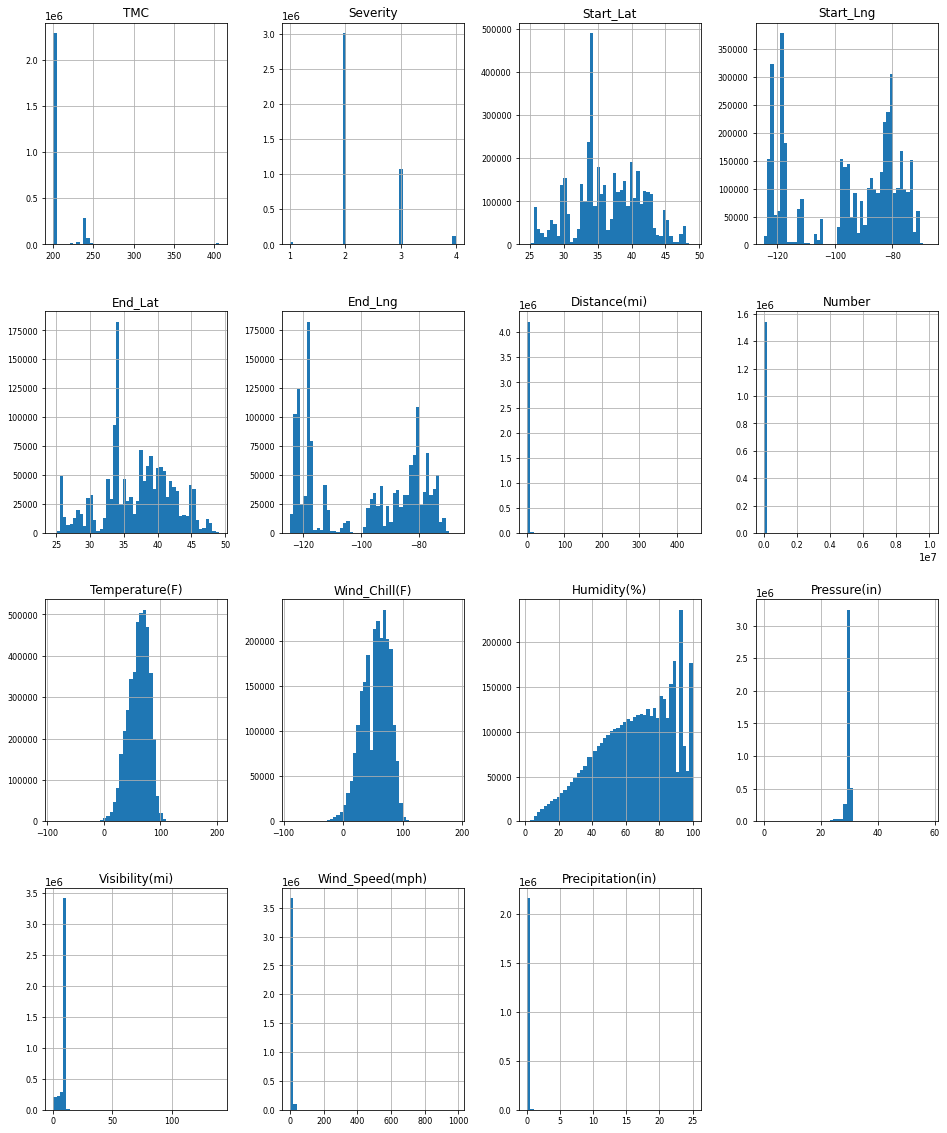

In [9]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### SUMMARY

- The dataset had around 4.2 million data records with 49 columns. 
- There are float amd object and ollean values in the columns. 
- We can also see there are Nan values from df.head
- From the histograms, we can see Start_Lat and End_lat, and  Start_Lng and End_Lng have similar data distribution.
- Distance, Number, Visbility, Wind_Speed and Precipitation are skewed.
- We will be exploring the data more in data visualization

# DATA PREPARATION for VISUALIZATION

### a. Handling time variables

In [10]:
# converting the above Start_Time and End_Time columns of type object to datatime object for analysis
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Year']=df['Start_Time'].dt.year # extracting the year 
df['Month']=df['Start_Time'].dt.strftime('%b') # extracting the month 
df['Day']=df['Start_Time'].dt.day # extracting the day 
df['Hour']=df['Start_Time'].dt.hour # extracting the hour 
df['Weekday']=df['Start_Time'].dt.strftime('%a') # extracting the weekday 
df.head()

ID    Source    TMC  Severity          Start_Time            End_Time  \
0  A-1  MapQuest  201.0         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2 2016-02-08 07:39:07 2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Turning_Loop Sunrise_Sunset  \
0  39.865147 -84.058723      NaN      NaN  ...         False          Night   
1  39.928059 -82.831184      NaN      NaN  ...         False          Night   
2  39.063148 -84.032608      NaN      NaN  ...         False          Night   
3  39.747753 -84.205582      NaN      NaN  ...         False          Night   
4  39.627781 -84.188354      NaN      NaN  ...         False            Day   

   Civil_Twilight Nautical_Twilight Astronomical_Twilight  Year Month Day  \
0           Night             Night                 Night  2016   Feb   8   
1           Night             Night                   Day  2016   Feb   8   
2           Night               Day                   Day  2016   Feb   8   
3             Day               Day                   Day  2016   Feb   8   
4             Day               Day                   Day  2016   Feb   8   

  Hour Weekday  
0    5     Mon  
1    6     Mon  
2    6     Mon  
3    7     Mon  
4    7     Mon  

[5 rows x 54 columns]

In [11]:
# lets get the duration of the using start and end time 
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
print("The shape of dataset now is:",(df.shape))

The shape of dataset now is: (4232541, 55)


In [12]:
# checking for outliers for the duration ( look for negative values as the duration cannot be negative )
df[td][df[td]<=0] # there are no outliers with negative values in time duration 

Series([], Name: Time_Duration(min), dtype: float64)

### SUMMARY 

- Extracted the date, month, and year from Start_Time Variables which will be used in in exploratory analysis

# EXPLORATORY ANALYSIS and VISUALIZATION

### a. Checking Severity values

1      29312
2    3006626
3    1072821
4     123782
Name: Severity, dtype: int64


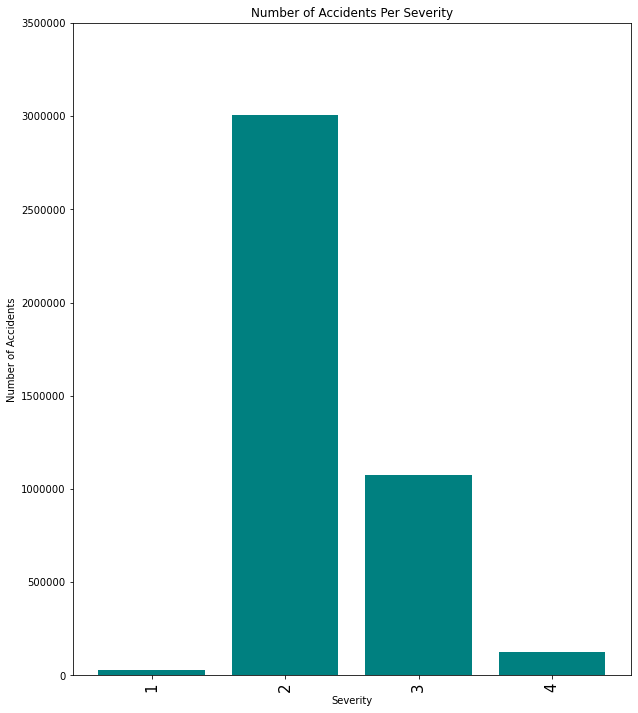

In [13]:
# checking the severity values
df['Severity'].value_counts()
print (df['Severity'].value_counts().sort_index())

plt.figure(figsize=(10, 12))
plt.title('Number of Accidents Per Severity')
plt.bar(df.groupby('Severity').count().index, df.groupby('Severity').count().State, color='teal')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(df.groupby('Severity').count().index, rotation='vertical', size=15)
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%d" % x, locs))
plt.show()

**We can see that** ***Severity 2*** **cases are the most reported accident case. The dataset also looks skewed.**

### b. Accident Count

This dataset contains traffic accident records in 49 states. We can use a map to see the accident distribution from 2016 to 2020. The top 10 states with the most accident count are highlighted in the map. Top 10 cities and zipcodes are also shown below.

In [14]:
states = df.State.unique()
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['State'])

<AxesSubplot:title={'center':'Accident distribution per state'}, xlabel='States', ylabel='Count'>

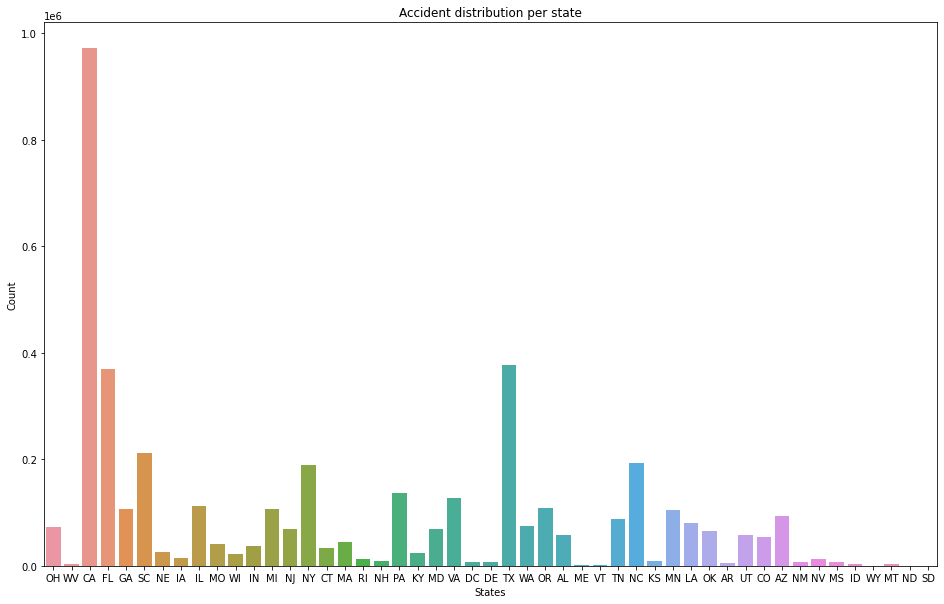

In [15]:
# Accidents Count by states 
plt.figure(figsize=(16,10))
plt.title('Accident distribution per state')
plt.xlabel('States')
plt.ylabel('Count')
sns.barplot(states, count_by_state)

In [16]:
pip install plotly-geo plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [17]:
#  Accidents Count by states 

import plotly.graph_objects as go
state_count_acc = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'magenta',
    colorbar_title = "Count Accidents",
))

fig.update_layout(
    title_text = '2016 - 2020 US Traffic Accident Dataset by State',
    geo_scope='usa',
)

fig.show()

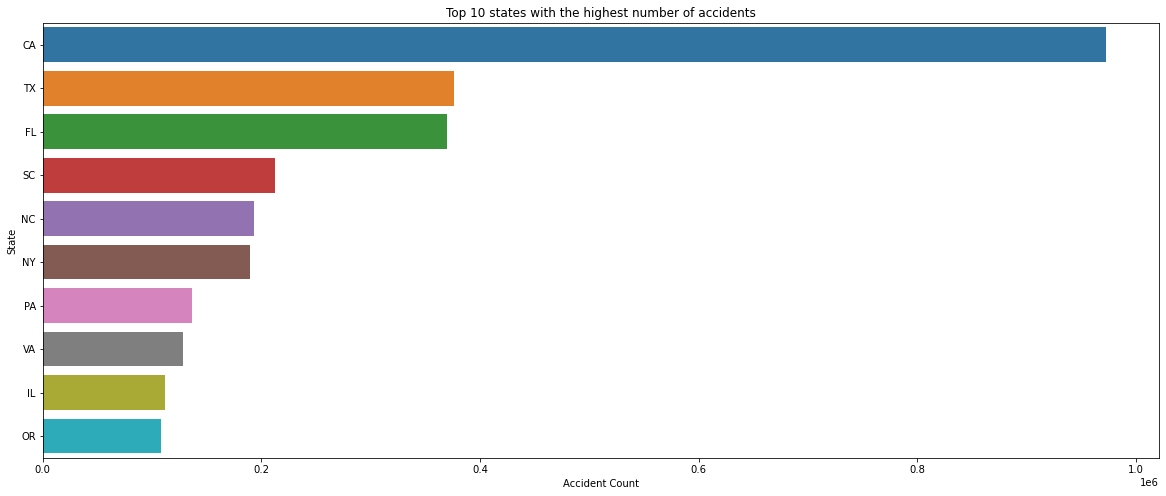

In [18]:
plt.figure(figsize=(20, 8))
plt.title("Top 10 states with the highest number of accidents")
sns.barplot(df["State"].value_counts()[:10].values, df["State"].value_counts()[:10].index, orient="h")
plt.xlabel("Accident Count")
plt.ylabel("State")
plt.show()

#### Severity Analysis by State

In [19]:
severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(df[(df['Severity']==1)&(df['State']==i)].count()['State'])
    severity_2_by_state.append(df[(df['Severity']==2)&(df['State']==i)].count()['State'])
    severity_3_by_state.append(df[(df['Severity']==3)&(df['State']==i)].count()['State'])
    severity_4_by_state.append(df[(df['Severity']==4)&(df['State']==i)].count()['State'])

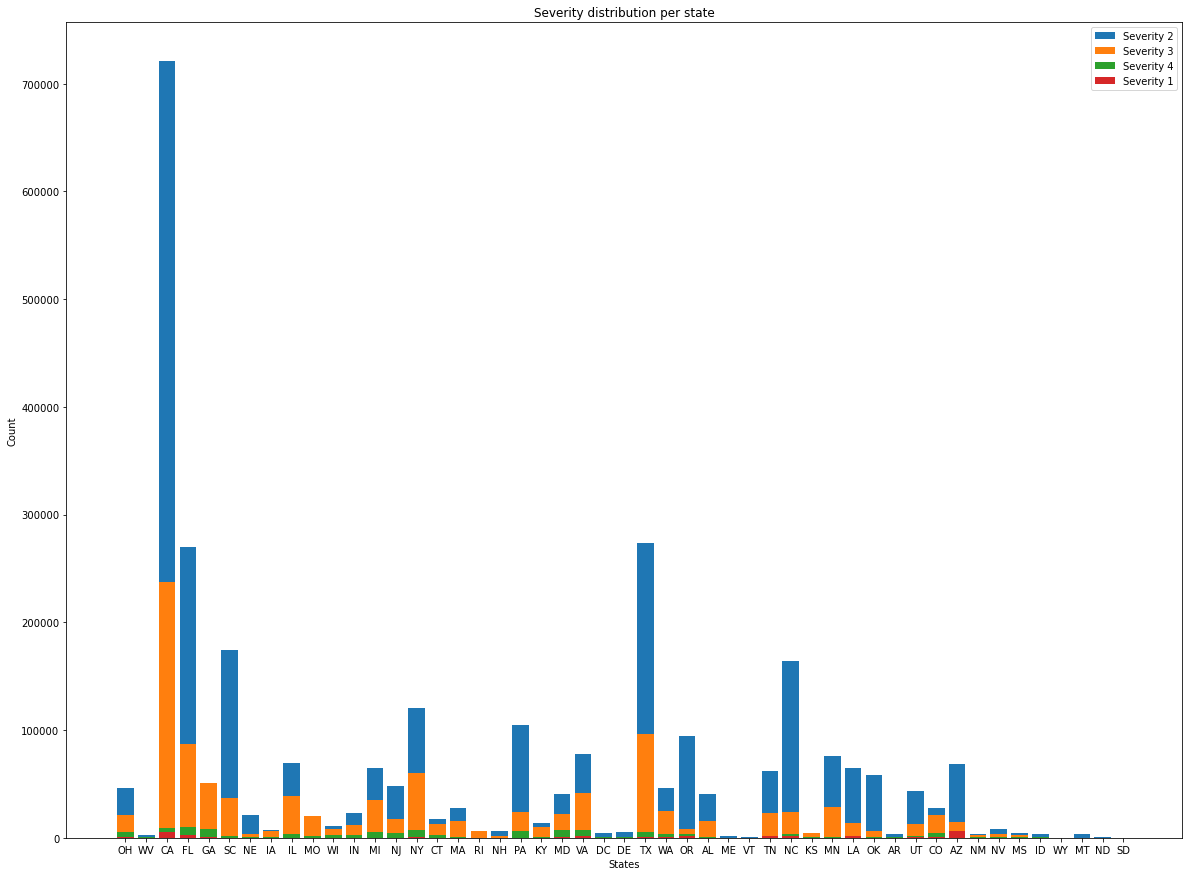

In [20]:
plt.figure(figsize=(20,15))

plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')
plt.bar(states, severity_1_by_state, label='Severity 1')

plt.title('Severity distribution per state')
plt.xlabel('States')
plt.ylabel('Count')
plt.legend()

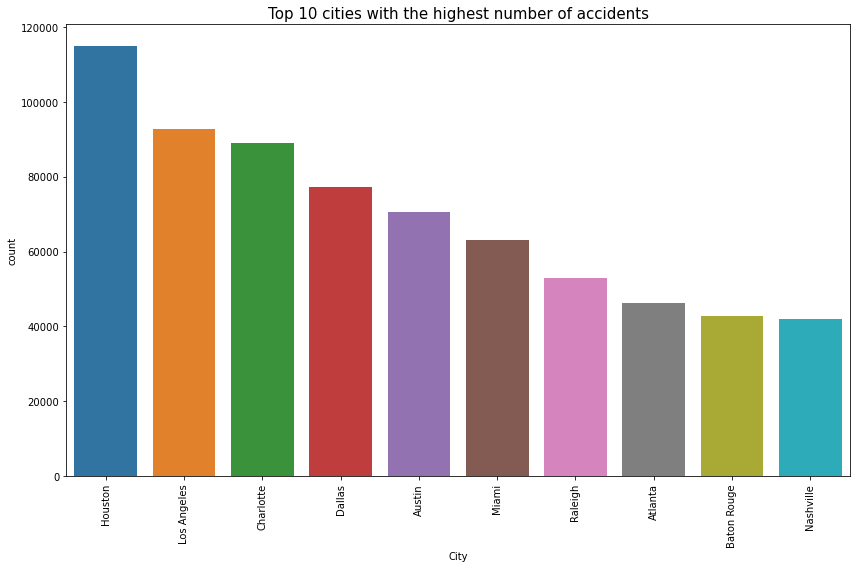

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(df['City'], order=df['City'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 cities with the highest number of accidents", fontsize=15)
plt.tight_layout()

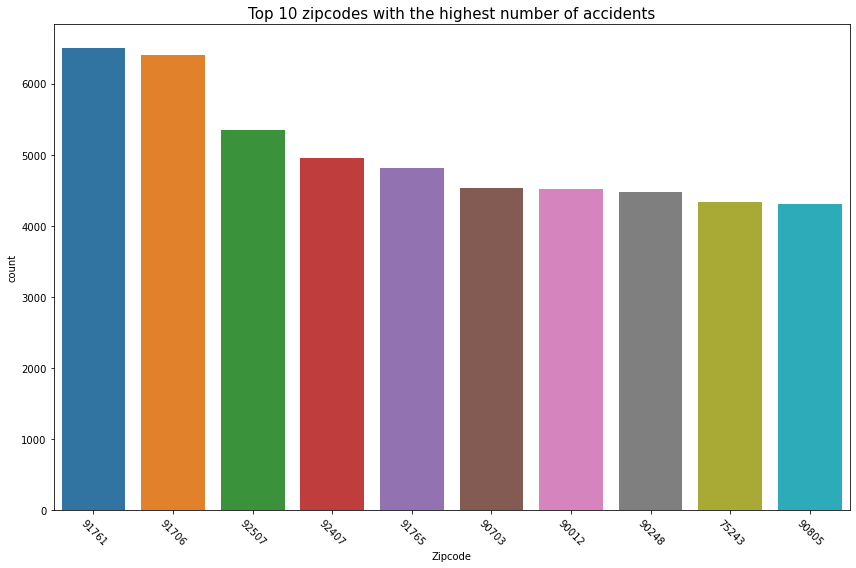

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(df['Zipcode'], order=df['Zipcode'].value_counts().iloc[:10].index)
plt.xticks(rotation=-45)
plt.title("Top 10 zipcodes with the highest number of accidents", fontsize=15)
plt.tight_layout()

<AxesSubplot:ylabel='State'>

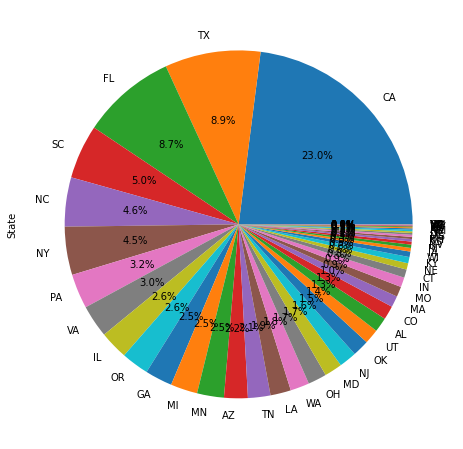

In [23]:
figsize=(12,12)
df.State.value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')

### SUMMARY

- We can see that majority of the accidents reported by each state are severity 2 and severity 3. The severity distribution graph clearly shows the distribution per state. 

- Further we see that California has the highest number of accident cases reported follwed by Texas and Florida. -  - The most accident-prone city in the USA is Houston which is in Texas followed by and Los Angeles in California. - With the zipcodes plot,  we observe that the following zipcodes  close to LA have highest accident counts.  91761 Ontario, 91706 Baldwin Park, 92507 Riverside 92407 Devore Hghts, 90703 Artesia are all close to LA

- Around 40.6% accidents are reported by the top 3 states. 

### c. Weather Condition analysis 

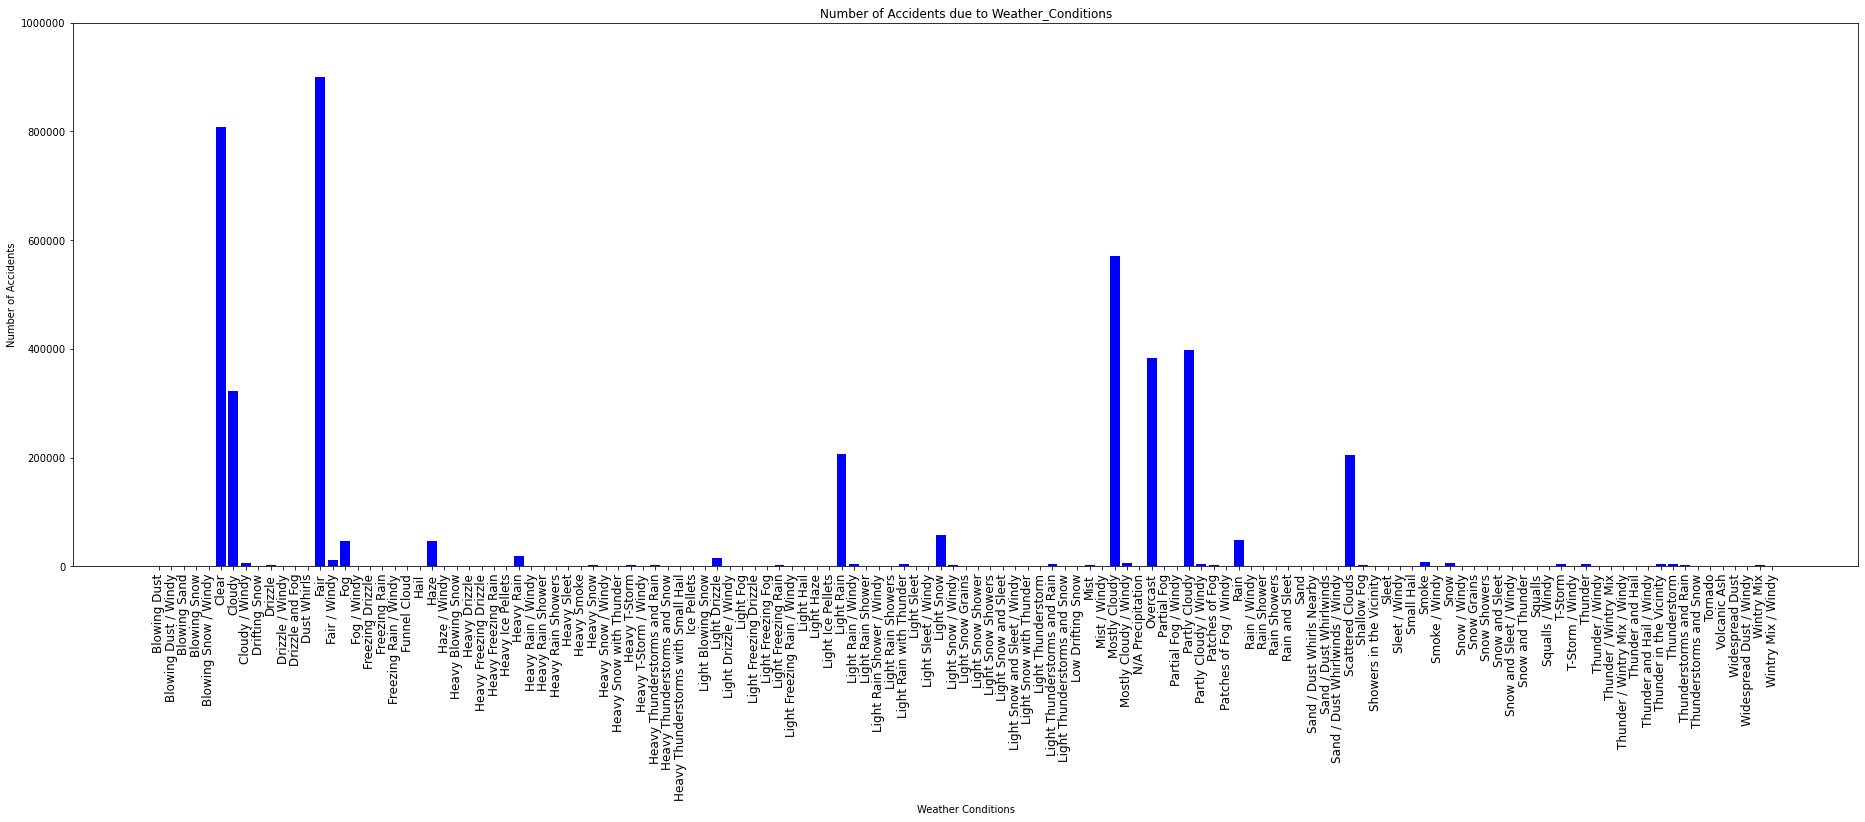

In [24]:
Weather = df.groupby('Weather_Condition').count()
plt.figure(figsize=(32, 10))
plt.title('Number of Accidents due to Weather_Conditions')
plt.bar(df.groupby('Weather_Condition').count().index, df.groupby('Weather_Condition').count().State, color='b')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(Weather.index, rotation='vertical', size=12)
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%d" % x, locs))
plt.show()

**Looks like there are wide range of weather conditions in the dataset. Plotting top 10 for better understanding**

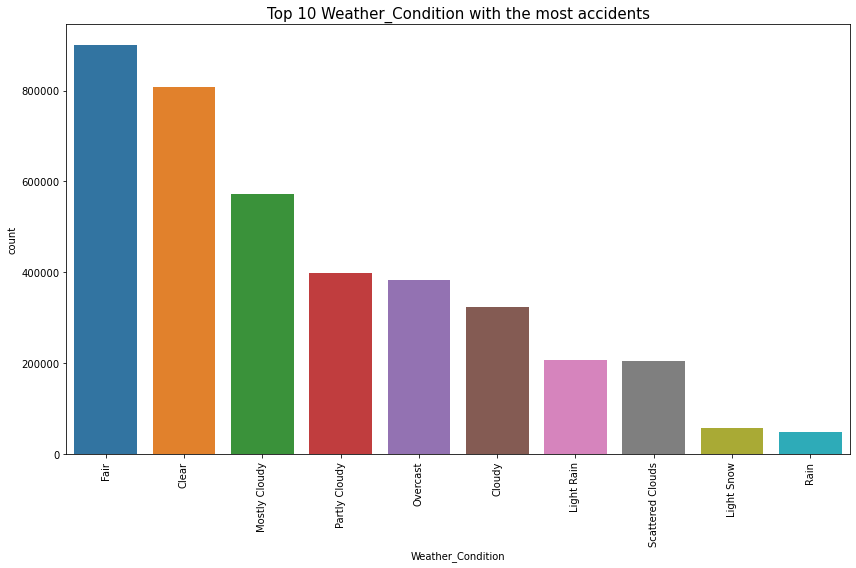

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(df['Weather_Condition'], order=df['Weather_Condition'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 Weather_Condition with the most accidents", fontsize=15)
plt.tight_layout()

#### Checking the Weather condition based on severity

<Figure size 2160x720 with 0 Axes>

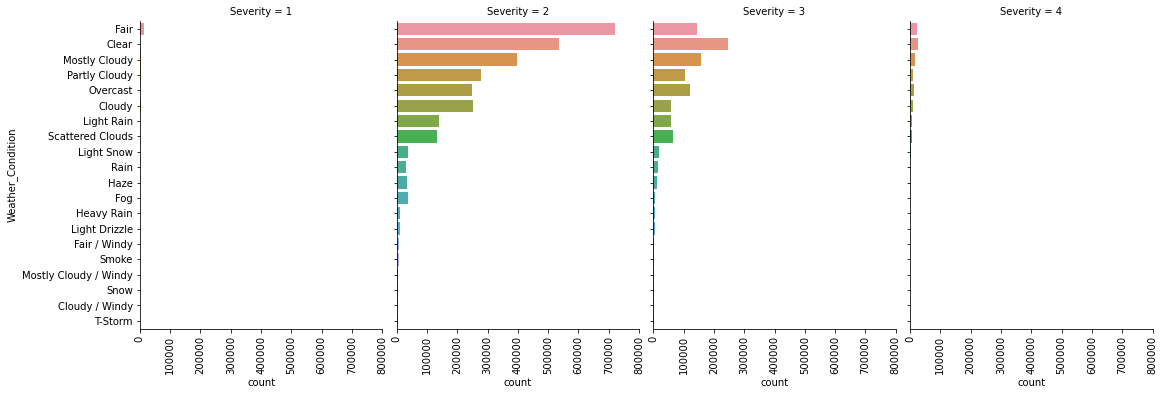

In [26]:
fig = plt.figure(figsize = (30, 10))
g = sns.catplot(y="Weather_Condition", col="Severity",
                data=df, kind="count", orient='v', order=df['Weather_Condition'].value_counts()[:20].index,
                height=5, aspect=.8);
g.set_xticklabels(rotation=90)
plt.show()

### SUMMARY

- From the graphs above,  we can see that most of the accidents have happened in fair and clear weather. Cloudy condition have also caused accidents. 
- From the plot for the most common weather conditions under each severity level, the distribution looks similar in each level. And we can see more severe accidents (Severity 3 and 4) also happen a lot during clear days.


### c. Visibility analysis 

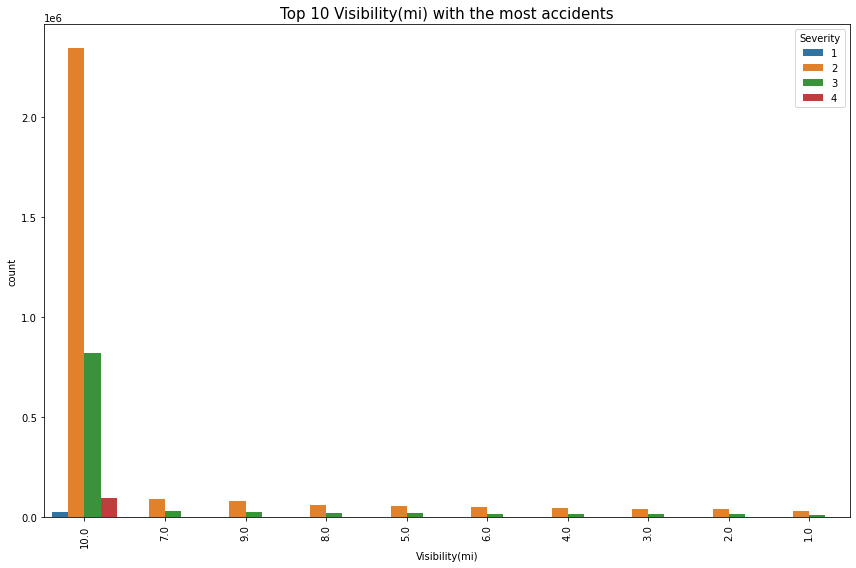

In [27]:
plt.figure(figsize=(12,8)) 
sns.countplot(df['Visibility(mi)'], order=df['Visibility(mi)'].value_counts().iloc[:10].index, hue=df['Severity'])
plt.xticks(rotation=90)
plt.title("Top 10 Visibility(mi) with the most accidents", fontsize=15)
plt.tight_layout()

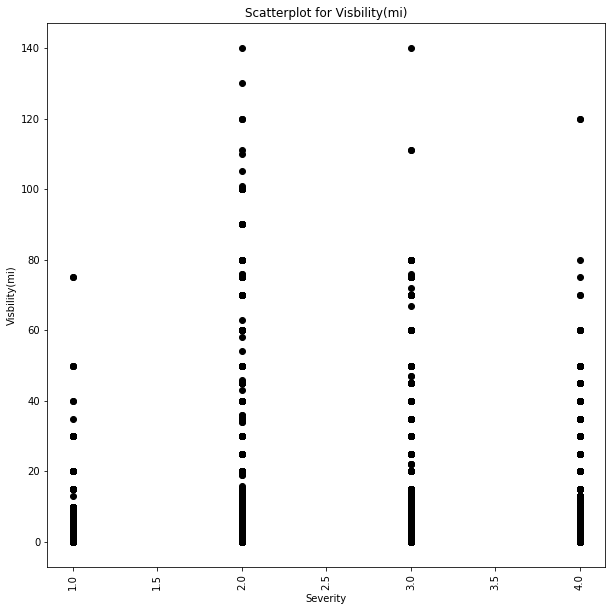

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Scatterplot for Visbility(mi)')
plt.xticks(rotation=90)
plt.xlabel('Severity')
plt.ylabel('Visbility(mi)')
ax.plot(df['Severity'],df['Visibility(mi)'],'ko')

### SUMMARY

- The plot shows that most of the accidents occurred when visibility was  around 10 miles which might indicate that the driver might be unwilling to drive if visbility is low and 10 miles could be that people might think its okay to drive with 10 miles visibility underestimating the the difficulty to drive. 
- From the plot its clear that most of the accidents have reported with a visibility around 10 miles indicating there were no issues with visibility at the time of accident.
- From scatter plot we can see that accidents have been reported with even more higher visbilities. 

### d. Analysis with Distance(mi)

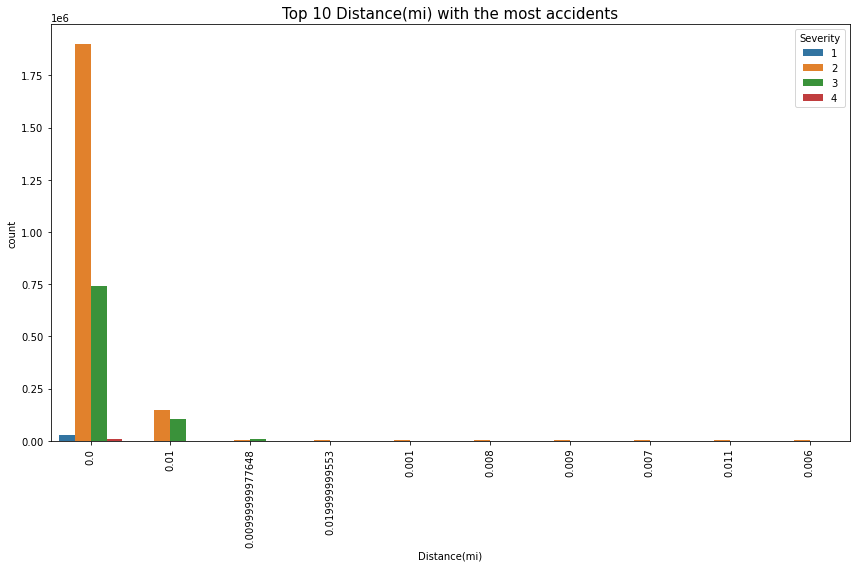

In [29]:
plt.figure(figsize=(12,8)) 
sns.countplot(df['Distance(mi)'], order=df['Distance(mi)'].value_counts().iloc[:10].index, hue=df['Severity'])
plt.xticks(rotation=90)
plt.title("Top 10 Distance(mi) with the most accidents", fontsize=15)
plt.tight_layout()

### SUMMARY

- The plot shows that most of distances recorded is 0 miles. This might indicate that most of the accidents did not affect more than 1 mile of the road and could be only few feet.

### e. Analysis with Time 

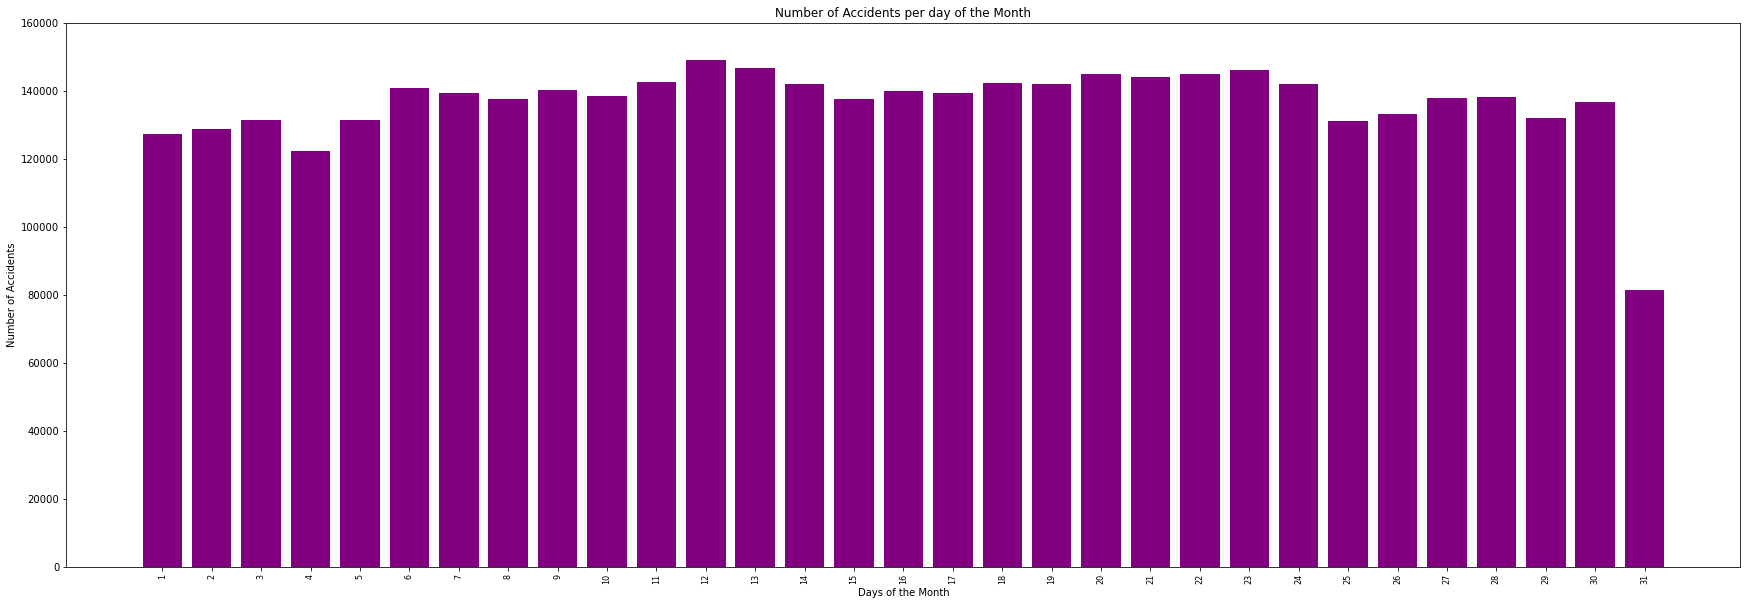

In [30]:
Time = df.groupby('Day').count()
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Month')
plt.bar(Time.index, Time.State, color='purple')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Accidents')
plt.xticks(Time.index, rotation='vertical', size=8)
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%d" % x, locs))
plt.show()

**The dip on 31st can be explained as 5 months donot have 31st day in the month. Thus plotting average accidents reported per day**

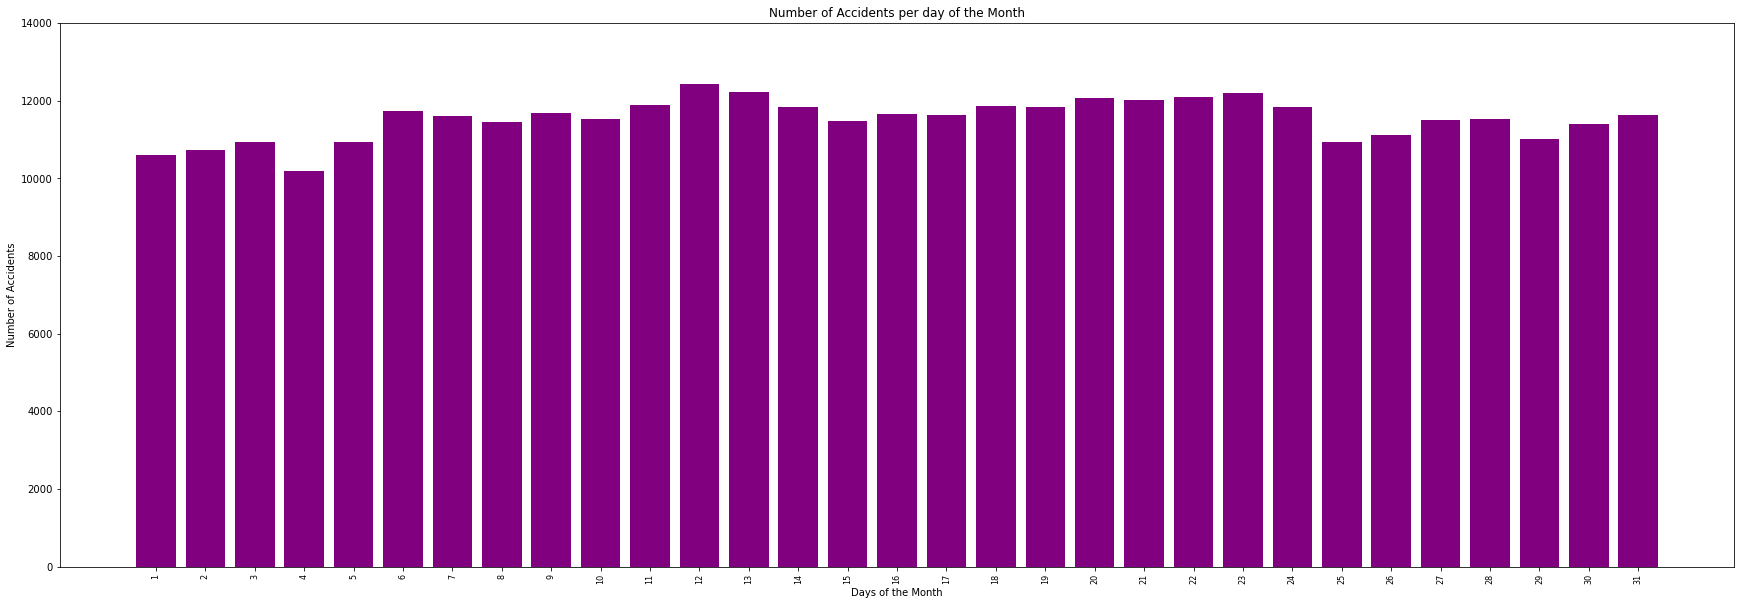

In [31]:
days1_30 = df[df['Day']!=31].groupby('Day').count()/12
days_31 = df[df['Day']==31].groupby('Day').count()/7 # 31st in 7 months of the year
Time = pd.concat([days1_30,days_31])
Time.tail()

plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Month')
plt.bar(Time.index, Time.State, color='purple')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Accidents')
plt.xticks(Time.index, rotation='vertical', size=8)
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%d" % x, locs))
plt.show()

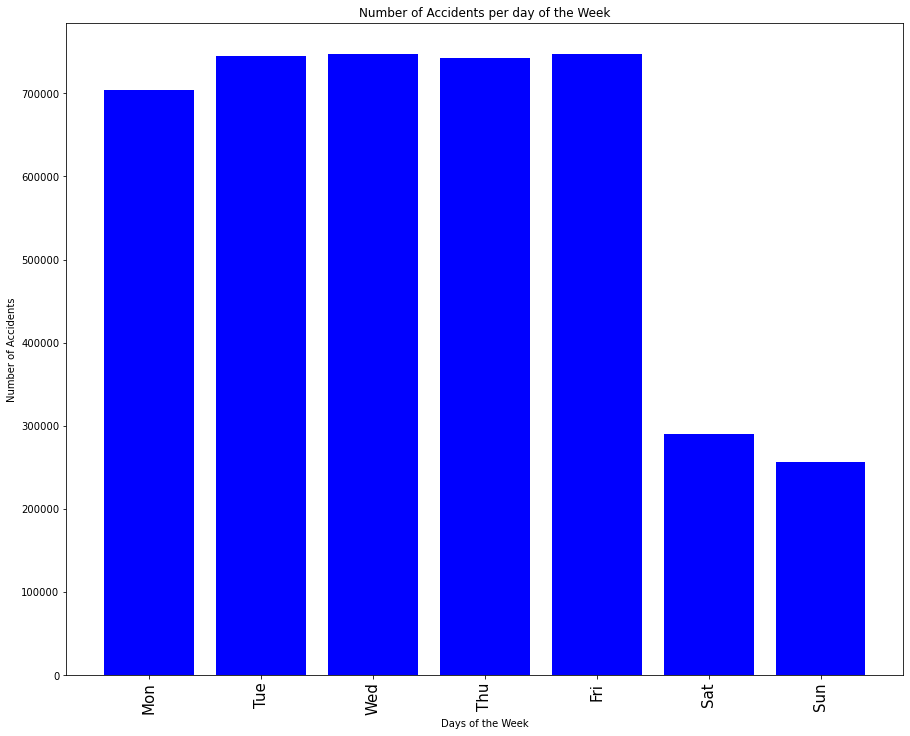

In [32]:
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Weekday = df.groupby('Weekday').count().reindex(cats) 
plt.figure(figsize=(15, 12))
plt.title('Number of Accidents per day of the Week')
plt.bar(Weekday.index, Weekday.State, color='Blue')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(Weekday.index, rotation='vertical', size=15)
plt.show()

### Checking the severity of accidents reported on the weekdays

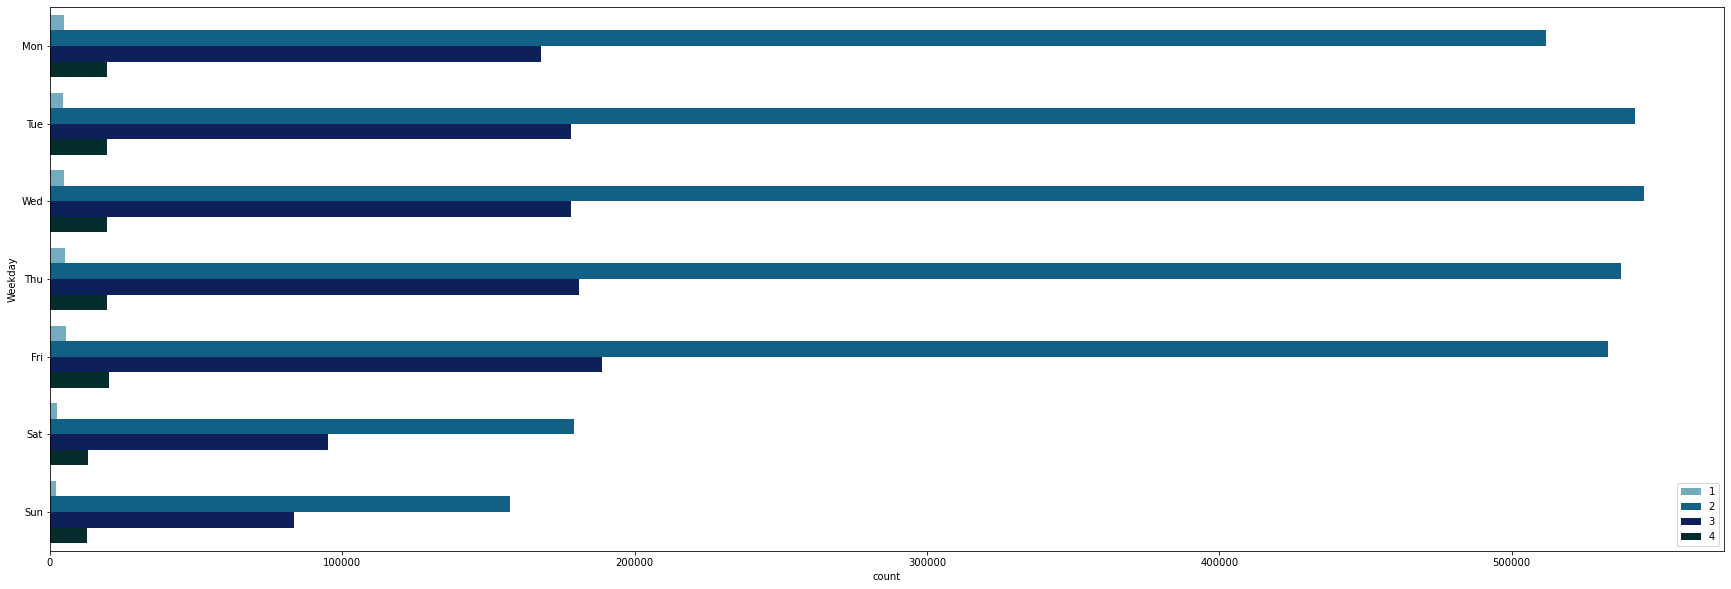

In [33]:
fig = plt.figure(figsize = (30, 10))
sns.countplot(y="Weekday", data=df, hue='Severity', palette='ocean_r')
plt.legend(loc='lower right')
plt.show()

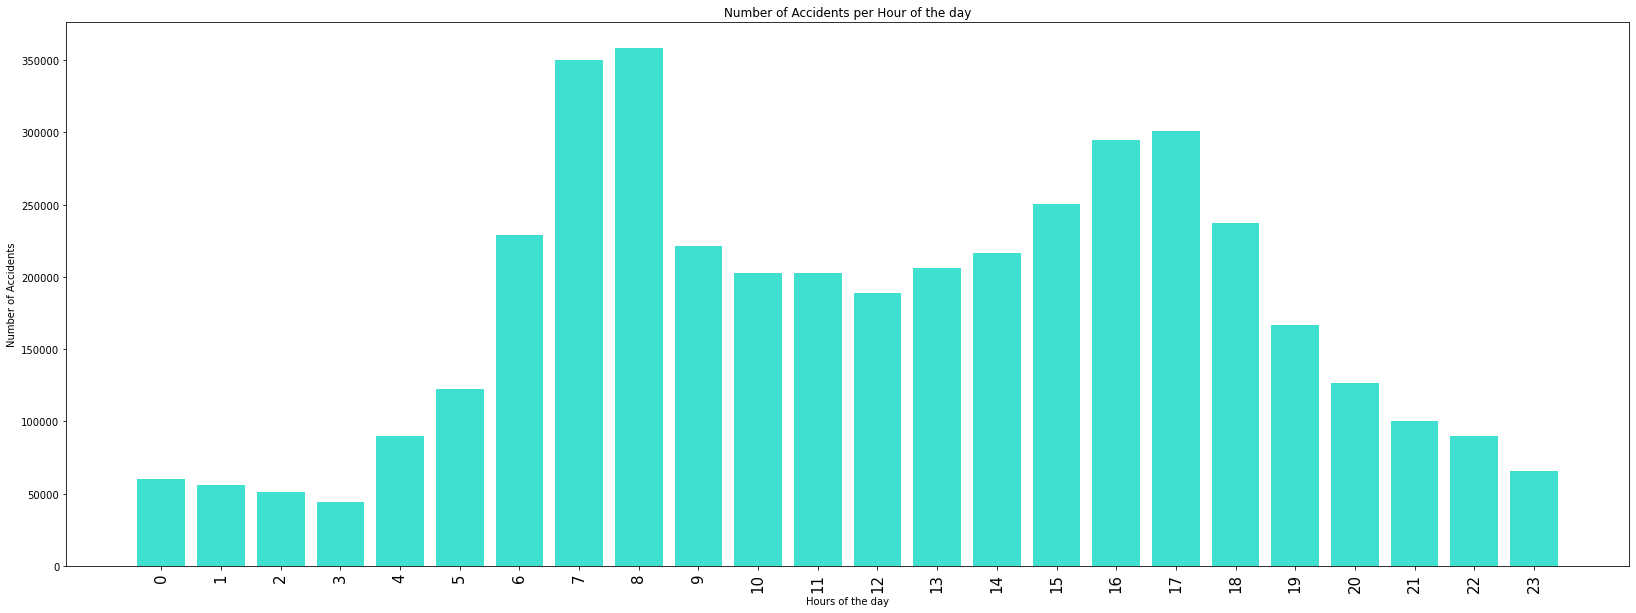

In [34]:
Hour = df.groupby('Hour').count()
plt.figure(figsize=(28, 10))
plt.title('Number of Accidents per Hour of the day')
plt.bar(Hour.index, Hour.Severity, color='turquoise')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Accidents')
plt.xticks(Hour.index, rotation='vertical', size=15)
plt.show()

<Figure size 1152x432 with 0 Axes>

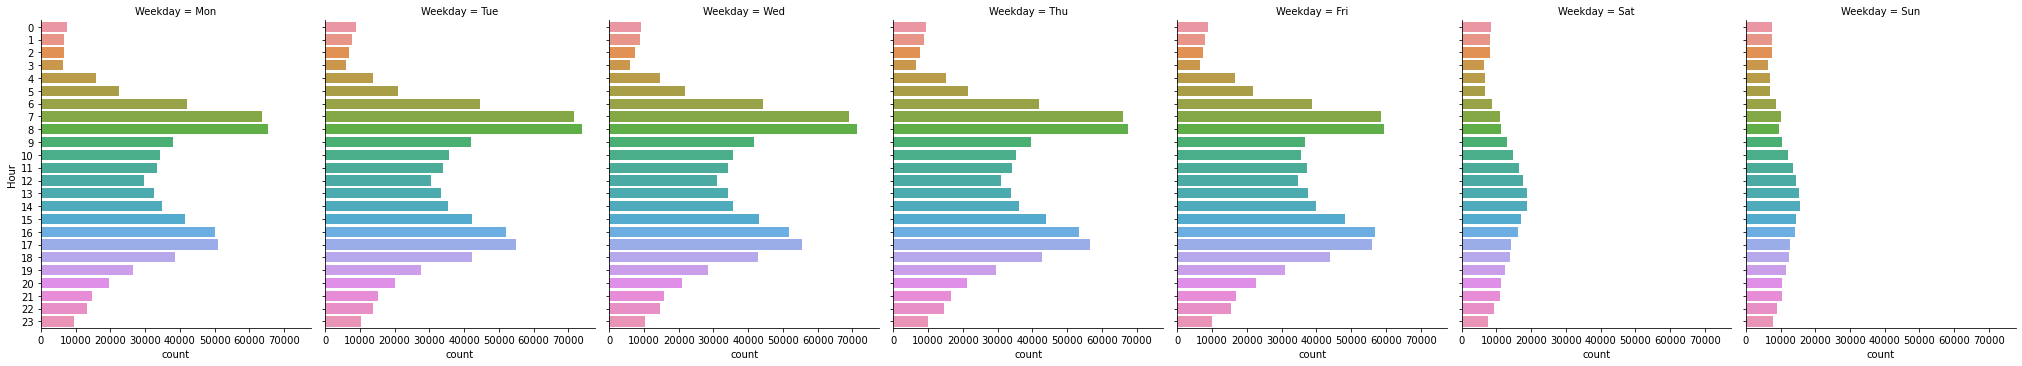

In [35]:
fig = plt.figure(figsize = (16, 6))
g = sns.catplot(y="Hour", col="Weekday",
                data=df, kind="count", orient='v',
                height=5, aspect=.8);
plt.show()

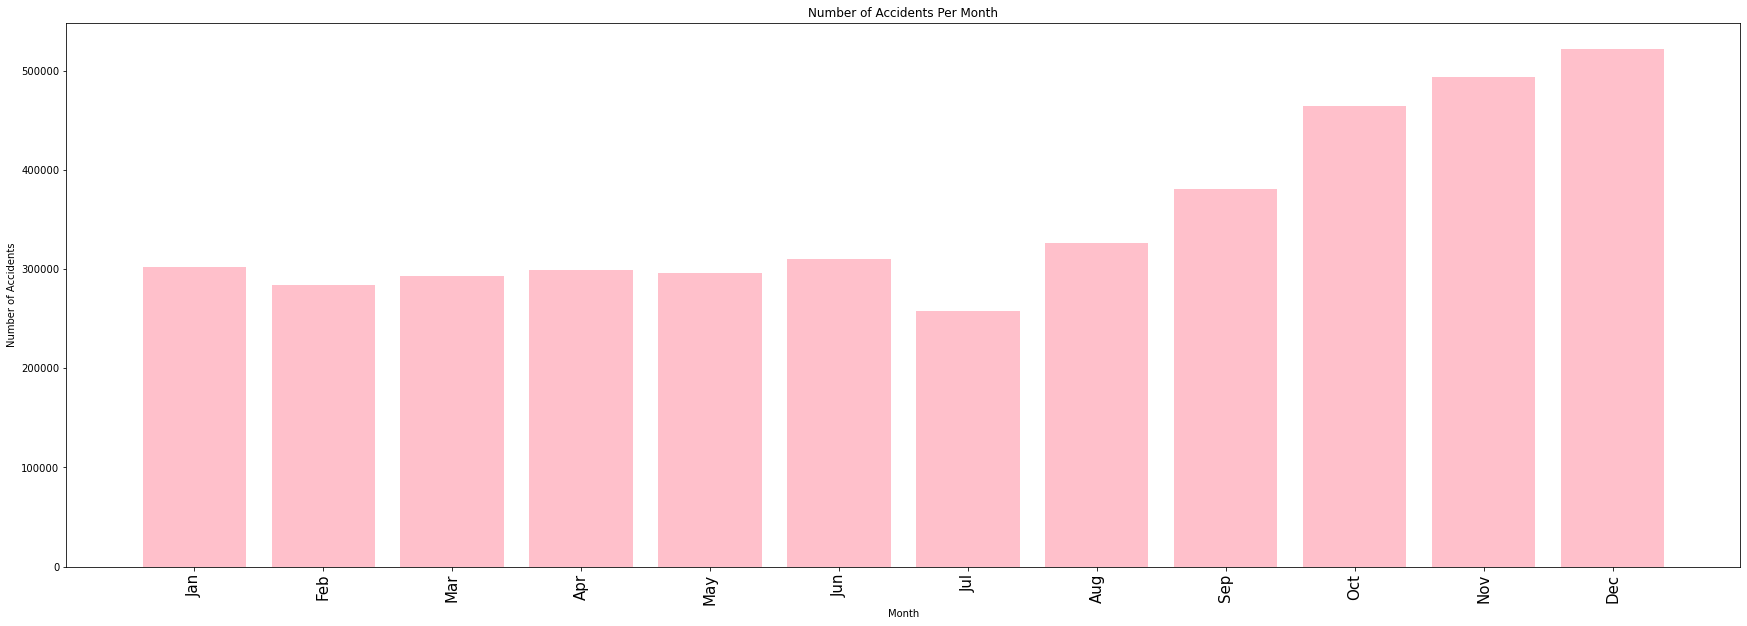

In [36]:
cat = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov','Dec']
Month = df.groupby('Month').count().reindex(cat) 
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents Per Month')
plt.bar(Month.index, Month.Severity, color='pink')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(Month.index, rotation='vertical', size=15)
plt.show()

### SUMMARY

- We do not see a significant difference with the number of accidents on different days of the month. The dip on 31st can be explained as 5 months donot have 31st day in the month. Thus plotting average accidents reported per day also showed that thre were no significant differences between the days of the month.

- From the above subplots, we can see that more accidents happen during weekdays than during weekends. The weekly pattern observed might be indicative of people being busy during weekdays resulting in more vehicles on the road. 

- Also, the hourly pattern of accidents indicate that most of the accidents happen at two intervals: 7am - 8am, 16pm - 17pm which is the time most of them commute on weekdays. Additionally it indicates that majority accidents happen during the daytime. 

- More accidents reported during Nov and dec. The accident count experiences an increase after July. Looking at the monthly pattern, the increase in the count might be a result of holiday season and many schools/colleges reopening.

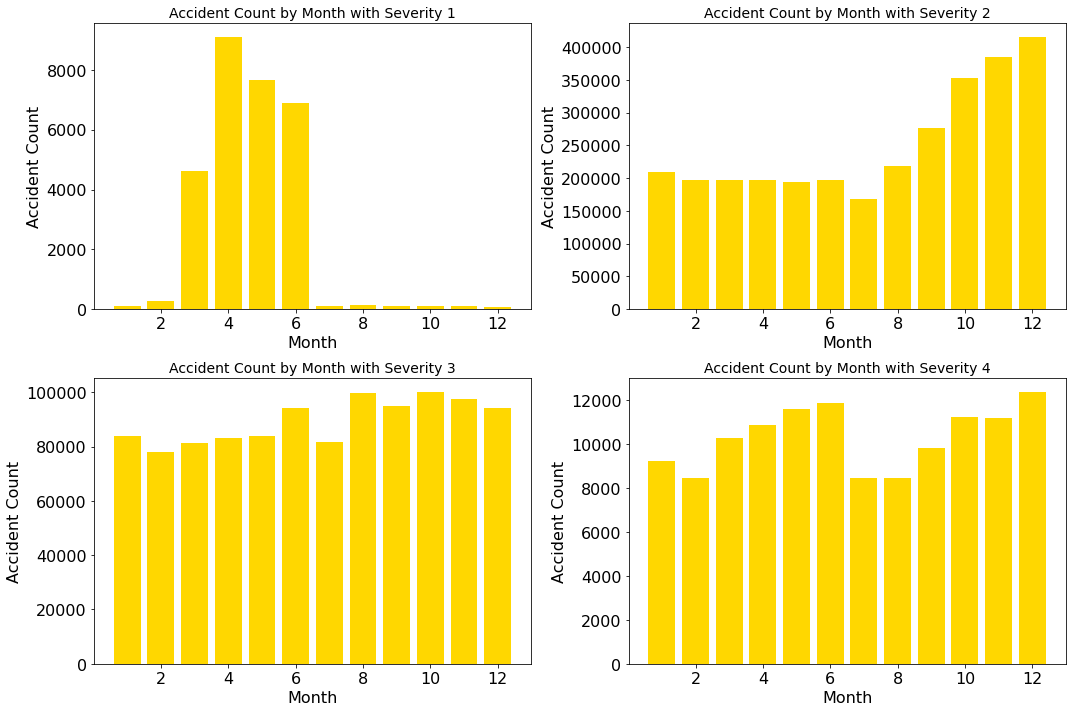

In [37]:
# converting the start time to y month date format to be able to get the time in Y-M-D H:M:S format
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8,  color='gold') # for each Severity get the total month accident count across all the years
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### SUMMARY
- Severity 1 accidents are reported more between March - June. Severity 2 cases have increased after July. Severity 3 have similar pattern across all the months and severity 4 have higest cases reported in June and December.

### Accident count over the years

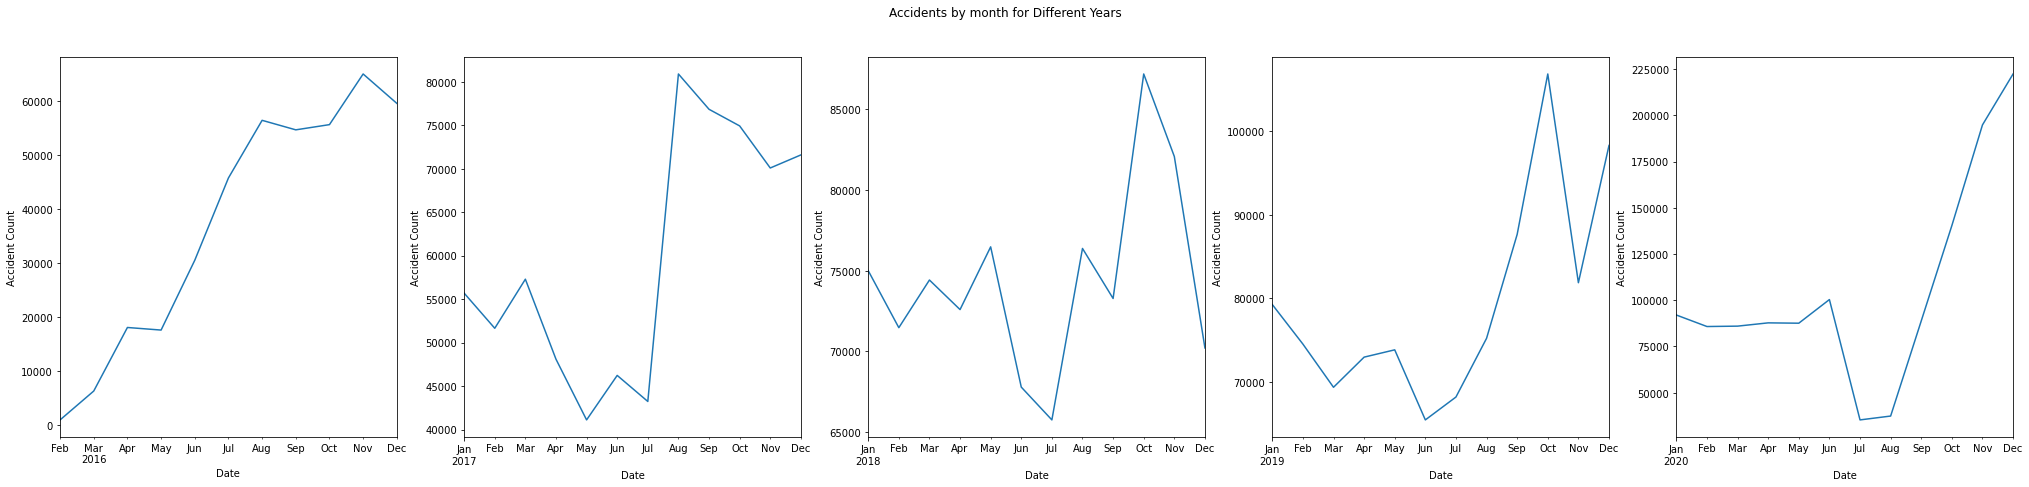

In [38]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
years = ['2016','2017','2018','2019','2020']
fig, _ = plt.subplots(1,5,figsize=(35,7), sharex='all', sharey='all')

fig.suptitle('Accidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,5,i)
    sample = df.loc[year].State.resample('M').count()
    sample.plot()
    #plt.ylim(0,100000)
    #plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

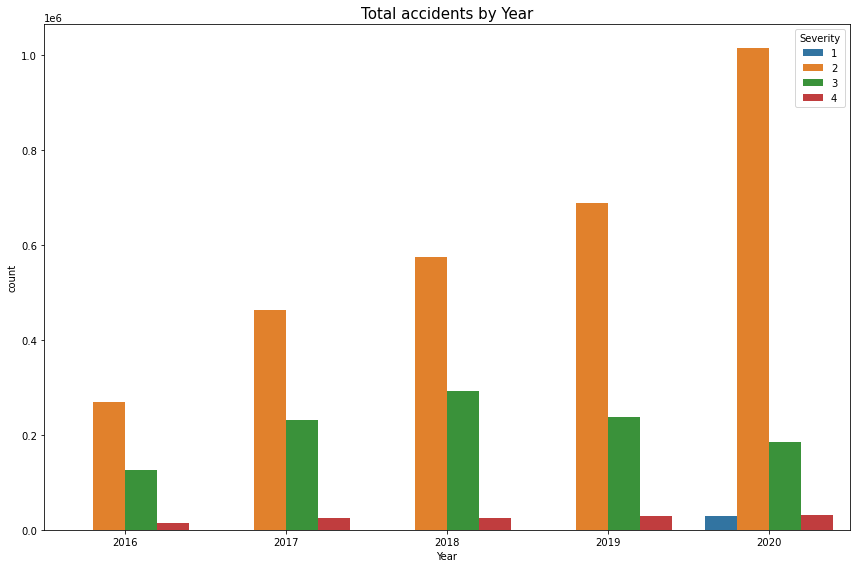

In [39]:
#Plot the total accidents by years
plt.figure(figsize=(12,8))
sns.countplot(df['Year'], hue=df['Severity'])
plt.xticks(rotation=0)
plt.title("Total accidents by Year", fontsize=15)
plt.tight_layout()

**We see that the number of accidents have increased over the years. Also Severity 1 is not seen in the above graph in 2016, 2017, 2018, 2019. Thus checking if Severity 1 cases were reported in all years.**

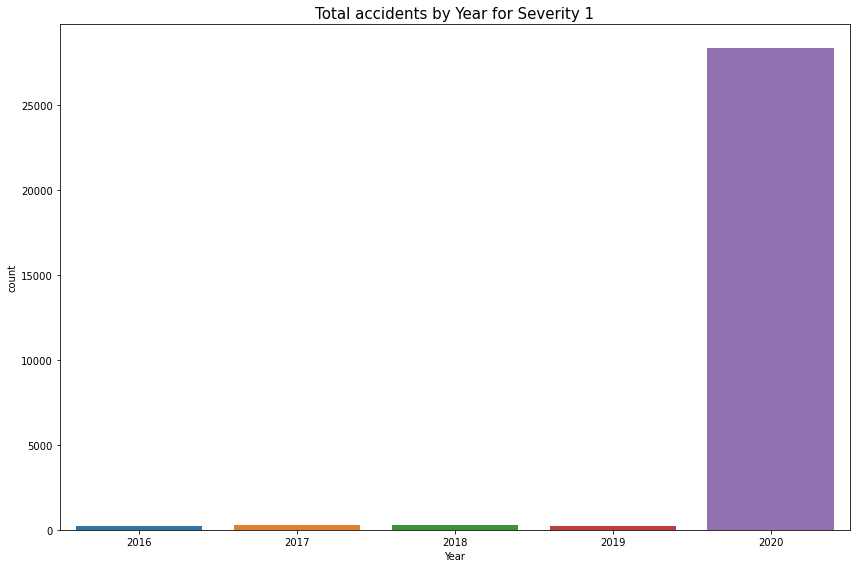

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(df[df.Severity ==1]['Start_Time'].dt.year)
plt.xticks(rotation=0)
plt.title("Total accidents by Year for Severity 1", fontsize=15)
plt.xlabel('Year')
plt.tight_layout()

### SUMMARY

- We can see that the data is starting from Feb of 2016 and until Dec 2020. The number of accidents have increased over the years. 
- Each year has Severity 2 cases reported as the highest among the all the accidents reported.We also see that over the years Severity 3 cases have been reported highest in 2018 and later seen a dip. 
- Severity 1 cases are least reported cases in all the years. 

### f. Analysis with Traffic objects

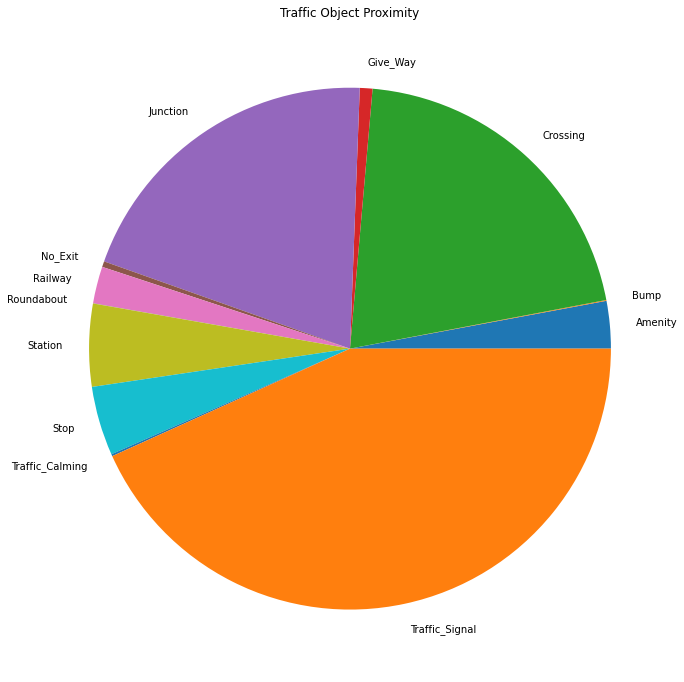

In [41]:
## Checking the boolean fields indicating the traffic object proximity 
traffic_obj = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
trfcdf = df[traffic_obj]
traffic_objects = trfcdf.sum(axis=0)
traffic_objects.plot.pie(figsize=(12,12))
plt.ylabel('')
plt.title('Traffic Object Proximity');

### SUMMARY

- From the above pie chart we can see that most of the accidents have reported near a traffic signal followed by a junction and crossing. 

# DATA PREPROCESSING AND FEATURE ENGINEERING

### a. Looking for missing values 

In [42]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:] # checking the percentage of missing values 

Feature  Missing_Percent(%)
2                     TMC           35.819240
8                 End_Lat           64.180760
9                 End_Lng           64.180760
11            Description            0.000047
12                 Number           63.506745
15                   City            0.003237
18                Zipcode            0.030525
20               Timezone            0.109036
21           Airport_Code            0.212000
22      Weather_Timestamp            1.480057
23         Temperature(F)            2.124020
24          Wind_Chill(F)           44.795809
25            Humidity(%)            2.255548
26           Pressure(in)            1.804684
27         Visibility(mi)            2.331176
28         Wind_Direction            1.975433
29        Wind_Speed(mph)           11.324781
30      Precipitation(in)           48.802575
31      Weather_Condition            2.324443
45         Sunrise_Sunset            0.003331
46         Civil_Twilight            0.003331
47      Nautical_Twilight            0.003331
48  Astronomical_Twilight            0.003331

### Handling non significant variables
- ~65 % End_Lat and End_Lng is missing which may indicate that the GPS was lost due to the damages in the accident. Thus they can be dropped as we have the Start_Lat and Start_Lng. 
- Country will have only entry which will be USA and can be dropped. 
- ID is just an identifier and can be dropped. 
- Number is the street number in the address field which again is not necessary as we have the zipcode. 
- Source is the API that reported the accident which is again not necessary in our analysis.
- Timezone is not useful as we have the State and can be dropped. 
- Weather_Timestamp can also be dropped as the start time of accident is already availble.
- Airport_Code is the airport based weather station that is closest to the location of the accident and can be dropped. 

In [43]:
df = df.drop(['Number','End_Lat', 'End_Lng', 'Country', 'ID','Source','Timezone','Weather_Timestamp','Airport_Code'], axis=1)
print("The shape of the dataset now is :",(df.shape))

The shape of the dataset now is : (4232541, 46)


### b. Handling TMC NA values

<AxesSubplot:ylabel='TMC'>

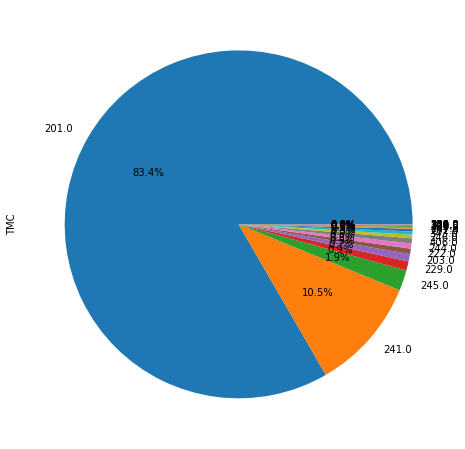

In [44]:
df.TMC.value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')

In [45]:
most_freq, count = stats.mode(df['TMC']) #check the mode of TMC column
print ("The most frequently occured for TMC column is : " , most_freq)

The most frequently occured for TMC column is :  [201.]


- TMC has around 35% missing data. According to https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List 201 is reported for accidents and 202 for sever accidents. Checking the frequency / mode of the TMC column, we see that the most frequently occured value is 201. So filling the NA values with 201 for TMC column.

In [46]:
df['TMC'].fillna(value=201, inplace=True)

### c. Handling Wind_Speed data 
Now looking at Wind_Speed column data, we see that Wind_Speed is Nan when Wind_Direction is Calm most of the time.

In [47]:
id_2_row = df[df.loc[:,['Wind_Speed(mph)']].isna().any(axis=1)]
print (id_2_row[['Wind_Speed(mph)', 'Wind_Direction']].query('Wind_Direction == \'Calm\''))

                     Wind_Speed(mph) Wind_Direction
time                                               
2016-02-08 05:46:00              NaN           Calm
2016-02-08 06:07:59              NaN           Calm
2016-02-08 19:28:00              NaN           Calm
2016-02-11 06:20:28              NaN           Calm
2016-02-11 07:53:55              NaN           Calm
...                              ...            ...
2017-08-30 10:15:55              NaN           Calm
2017-08-30 20:01:40              NaN           Calm
2017-08-30 20:01:40              NaN           Calm
2017-08-30 20:48:10              NaN           Calm
2019-02-15 08:47:40              NaN           Calm

[368269 rows x 2 columns]


**'Wind_Speed(mph)' is missing when the 'Wind_Direction' is calm, thus we can consider it 0.**

In [48]:
df.loc[df['Wind_Direction'] == 'Calm', 'Wind_Speed(mph)'] = 0

Checking the missing values again

In [49]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:] # checking the percentage of missing values 

Feature  Missing_Percent(%)
7             Description            0.000047
10                   City            0.003237
13                Zipcode            0.030525
14         Temperature(F)            2.124020
15          Wind_Chill(F)           44.795809
16            Humidity(%)            2.255548
17           Pressure(in)            1.804684
18         Visibility(mi)            2.331176
19         Wind_Direction            1.975433
20        Wind_Speed(mph)            2.623885
21      Precipitation(in)           48.802575
22      Weather_Condition            2.324443
36         Sunrise_Sunset            0.003331
37         Civil_Twilight            0.003331
38      Nautical_Twilight            0.003331
39  Astronomical_Twilight            0.003331

### d. Handling NA values for continous variables
- Filling in mean values for Pressure, Temperature, Wind_Chill, Humidity, Wind_Speed and Precipitation


In [50]:
df['Pressure(in)']=df['Pressure(in)'].fillna(df['Pressure(in)'].mean())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())

### e. Handling NA values for categorical variables
- filling in mode values for Wind_Direction, Weather_Condition. 
- Same percentage of data is missing for Sunrise_Sunset, Civil_Twilight, Nautical_Twilight and Astronomical_Twilight indicating that when one of the column data is missing , the the data from other columns is also missing. So Civil_Twilight, Nautical_Twilight and Astronomical_Twilight columns can be dropped.


In [51]:
df['Wind_Direction'] = df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0])
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0])
df = df.drop(['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

### f. Checking the co-relation between the features using heatmap

In [52]:
X = df
X.head()

TMC  Severity          Start_Time            End_Time  \
time                                                                           
2016-02-08 05:46:00  201.0         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
2016-02-08 06:07:59  201.0         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2016-02-08 06:49:27  201.0         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
2016-02-08 07:23:34  201.0         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
2016-02-08 07:39:07  201.0         2 2016-02-08 07:39:07 2016-02-08 08:09:07   

                     Start_Lat  Start_Lng  Distance(mi)  \
time                                                      
2016-02-08 05:46:00  39.865147 -84.058723          0.01   
2016-02-08 06:07:59  39.928059 -82.831184          0.01   
2016-02-08 06:49:27  39.063148 -84.032608          0.01   
2016-02-08 07:23:34  39.747753 -84.205582          0.01   
2016-02-08 07:39:07  39.627781 -84.188354          0.01   

                                                           Description  \
time                                                                     
2016-02-08 05:46:00  Right lane blocked due to accident on I-70 Eas...   
2016-02-08 06:07:59  Accident on Brice Rd at Tussing Rd. Expect del...   
2016-02-08 06:49:27  Accident on OH-32 State Route 32 Westbound at ...   
2016-02-08 07:23:34  Accident on I-75 Southbound at Exits 52 52B US...   
2016-02-08 07:39:07  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                                        Street Side  ... Traffic_Calming  \
time                                                 ...                   
2016-02-08 05:46:00                     I-70 E    R  ...           False   
2016-02-08 06:07:59                   Brice Rd    L  ...           False   
2016-02-08 06:49:27             State Route 32    R  ...           False   
2016-02-08 07:23:34                     I-75 S    R  ...           False   
2016-02-08 07:39:07  Miamisburg Centerville Rd    R  ...           False   

                    Traffic_Signal Turning_Loop Sunrise_Sunset  Year  Month  \
time                                                                          
2016-02-08 05:46:00          False        False          Night  2016    Feb   
2016-02-08 06:07:59          False        False          Night  2016    Feb   
2016-02-08 06:49:27           True        False          Night  2016    Feb   
2016-02-08 07:23:34          False        False          Night  2016    Feb   
2016-02-08 07:39:07           True        False            Day  2016    Feb   

                     Day  Hour  Weekday Time_Duration(min)  
time                                                        
2016-02-08 05:46:00    8     5      Mon              314.0  
2016-02-08 06:07:59    8     6      Mon               30.0  
2016-02-08 06:49:27    8     6      Mon               30.0  
2016-02-08 07:23:34    8     7      Mon               30.0  
2016-02-08 07:39:07    8     7      Mon               30.0  

[5 rows x 43 columns]

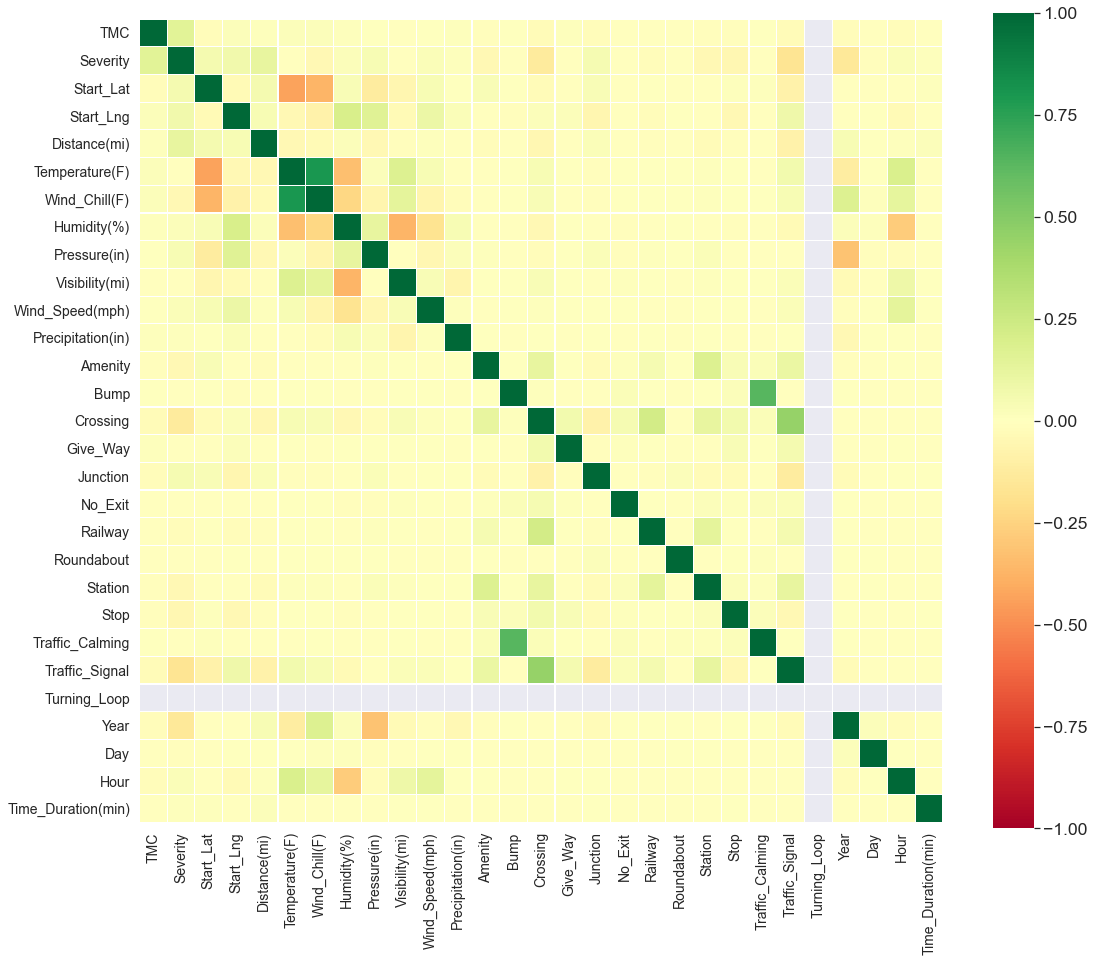

In [54]:
#Generating Heatmap

x=np.linspace(0,1)
y=x**2

covariance_matrix = X.corr()

fig=plt.figure(figsize=(30,20)) 

sns.set(font_scale=1.6)
ax= fig.add_subplot(111)
g = sns.heatmap(covariance_matrix, vmin=-1, vmax=1,cmap='RdYlGn',linewidths=0.2 ,annot_kws={'size':15}, square=True, ax=ax)

g=plt.gcf()
g.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



***From the Covariance Matrix, we can see that Windchill are tempertaure are related. One of the columns can be dropped. Turning_loop is always false. Thus dropping Turing_Loop, Wind_Chill.***

In [55]:
X.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'Time_Duration(min)'],
      dtype='object')

***Further we can drop the Street,County, Zipcode and keep just the city and state as all of them have details about the location of the accident.***
***Start_Time was converted into date time format and hence can be dropped. End_Time and Start_Time was used to calculate Time_Duration and hence End_Time can be dropped.***
***Description also can be dropped as it basically summarizes the effect the accidents had on traffic patterns in teh area. This is very different for very accident and would not be best to visualize the data.***

In [56]:
X = X.drop(['Street','County','Zipcode','Turning_Loop','Wind_Chill(F)','Start_Time', 'End_Time','Description'], axis=1)
X.head()

TMC  Severity  Start_Lat  Start_Lng  Distance(mi) Side  \
time                                                                            
2016-02-08 05:46:00  201.0         3  39.865147 -84.058723          0.01    R   
2016-02-08 06:07:59  201.0         2  39.928059 -82.831184          0.01    L   
2016-02-08 06:49:27  201.0         2  39.063148 -84.032608          0.01    R   
2016-02-08 07:23:34  201.0         3  39.747753 -84.205582          0.01    R   
2016-02-08 07:39:07  201.0         2  39.627781 -84.188354          0.01    R   

                             City State  Temperature(F)  Humidity(%)  ...  \
time                                                                  ...   
2016-02-08 05:46:00        Dayton    OH            36.9         91.0  ...   
2016-02-08 06:07:59  Reynoldsburg    OH            37.9        100.0  ...   
2016-02-08 06:49:27  Williamsburg    OH            36.0        100.0  ...   
2016-02-08 07:23:34        Dayton    OH            35.1         96.0  ...   
2016-02-08 07:39:07        Dayton    OH            36.0         89.0  ...   

                      Stop  Traffic_Calming Traffic_Signal  Sunrise_Sunset  \
time                                                                         
2016-02-08 05:46:00  False            False          False           Night   
2016-02-08 06:07:59  False            False          False           Night   
2016-02-08 06:49:27  False            False           True           Night   
2016-02-08 07:23:34  False            False          False           Night   
2016-02-08 07:39:07  False            False           True             Day   

                     Year Month  Day  Hour  Weekday  Time_Duration(min)  
time                                                                     
2016-02-08 05:46:00  2016   Feb    8     5      Mon               314.0  
2016-02-08 06:07:59  2016   Feb    8     6      Mon                30.0  
2016-02-08 06:49:27  2016   Feb    8     6      Mon                30.0  
2016-02-08 07:23:34  2016   Feb    8     7      Mon                30.0  
2016-02-08 07:39:07  2016   Feb    8     7      Mon                30.0  

[5 rows x 35 columns]

### g. Checking and dropping if there are any duplicates in the dataset

In [57]:
print("Number of records before dropping duplicates:", len(X.index))
X.drop_duplicates(inplace=True)
print("Number of records after dropping duplicates:", len(X.index))

Number of records before dropping duplicates: 4232541
Number of records after dropping duplicates: 4086311


### h.  Handling Weather_condition as there are a lot of unique values. 

In [58]:
WCs = X["Weather_Condition"].unique() # checking the unique values of weather_condition
print(len(WCs))
print(WCs)

131
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' 'Fair' 'Light Rain Showers'
 'Mist' 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Volcanic Ash'
 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust' 'Fair / Windy'
 'Rain Showers' 'Mostly Cloudy / Windy' 'Light Rain / Windy' 'Hail'
 'Heavy Drizzle' 'Showers in the Vicinity' 'Thunderstorm'
 'Light Rain Shower' 'Light Rain with Thunder' 'Partly Cloudy / Windy'
 'Thunder in the Vicinity' 'T-Storm' 'Heavy Thunderstorms and Rain'
 'Thunder' 'Heavy T-Storm' 'Funnel Cloud' 'Heavy T-Storm / Windy'
 'Blowing Snow' 'Light Thunderstorms and Snow' 'Heavy Snow'
 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets' 'Squalls'
 'N/A Precipitation' 'Cloudy / Windy' 'Light Fog' 'Sand' 'Snow Gr

In [59]:
 # making the weather_condition more generic
X.loc[X["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
X.loc[X["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
X.loc[X["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
X.loc[X["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
X.loc[X["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
X.loc[X["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
X.loc[X["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
X.loc[X["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
X.loc[X["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
X.loc[X["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
X.loc[X["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = "Precipitation"

print(X["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' 'Smoke' 'Thunderstorm' 'Sand'
 'Windy' 'Hail' 'Precipitation' 'Tornado']


### i. Similarly, Wind_Direction can be set to a generic values.

In [60]:
print(X["Wind_Direction"].unique()) # checking unique values 

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' 'CALM' 'S' 'VAR'
 'N']


In [61]:
# setting the words to alphabets representing the direction
X.loc[X["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
X.loc[X["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
X.loc[X["Wind_Direction"] == "East", "Wind_Direction"] = "E"
X.loc[X["Wind_Direction"] == "North", "Wind_Direction"] = "N"
X.loc[X["Wind_Direction"] == "South", "Wind_Direction"] = "S"
X.loc[X["Wind_Direction"] == "West", "Wind_Direction"] = "W"

X["Wind_Direction"].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'W', 'NNW', 'NNE', 'S',
       'N', 'Variable', 'SE', 'SSE', 'ESE', 'E', 'NE', 'ENE'],
      dtype=object)

In [62]:
# Direction with 3 Aphabets can be reduced to 2 making it more understandable and readable 

X["Wind_Direction"] = X["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

X["Wind_Direction"].unique()

array(['Calm', 'SW', 'NW', 'W', 'NE', 'S', 'N', 'Variable', 'SE', 'E'],
      dtype=object)

### j. Checking for Side unique values

In [63]:
X["Side"].unique()

array(['R', 'L', ' '], dtype=object)

***There is an empty string which can be removed***

In [64]:
X = X[X["Side"] != " "]
X["Side"].unique()

array(['R', 'L'], dtype=object)

### k. Checking for any other missing values 

In [65]:
missing = pd.DataFrame(X.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / X.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

Feature  Missing_Percent(%)
6    City             0.00323

***only city have NA values so droping those rows with city Na values*** 

In [66]:
X.dropna(subset =['City'], inplace=True) # dropping rows with null values for city 

In [67]:
missing = pd.DataFrame(X.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / X.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

Empty DataFrame
Columns: [Feature, Missing_Percent(%)]
Index: []

### l. Encoding the categorical Features
Transforming the categorical features into numerical values for analysis

In [68]:
X.dtypes

TMC                   float64
Severity                int64
Start_Lat             float64
Start_Lng             float64
Distance(mi)          float64
Side                   object
City                   object
State                  object
Temperature(F)        float64
Humidity(%)           float64
Pressure(in)          float64
Visibility(mi)        float64
Wind_Direction         object
Wind_Speed(mph)       float64
Precipitation(in)     float64
Weather_Condition      object
Amenity                  bool
Bump                     bool
Crossing                 bool
Give_Way                 bool
Junction                 bool
No_Exit                  bool
Railway                  bool
Roundabout               bool
Station                  bool
Stop                     bool
Traffic_Calming          bool
Traffic_Signal           bool
Sunrise_Sunset         object
Year                    int64
Month                  object
Day                     int64
Hour                    int64
Weekday   

In [69]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# encoding boolean values using Label encoder
X['Amenity'] = label_encoder.fit_transform(X['Amenity'])
X['Bump'] = label_encoder.fit_transform(X['Bump'])
X['Crossing'] = label_encoder.fit_transform(X['Crossing'])
X['Give_Way'] = label_encoder.fit_transform(X['Give_Way'])
X['Junction'] = label_encoder.fit_transform(X['Junction'])
X['No_Exit'] = label_encoder.fit_transform(X['No_Exit'])
X['Railway'] = label_encoder.fit_transform(X['Railway'])
X['Roundabout'] = label_encoder.fit_transform(X['Roundabout'])
X['Station'] = label_encoder.fit_transform(X['Station'])
X['Stop'] = label_encoder.fit_transform(X['Stop'])
X['Traffic_Calming'] = label_encoder.fit_transform(X['Traffic_Calming'])
X['Traffic_Signal'] = label_encoder.fit_transform(X['Traffic_Signal'])


# encoding objects
X['Side'] = label_encoder.fit_transform(X['Side'])
X['City'] = label_encoder.fit_transform(X['City'])
X['State'] = label_encoder.fit_transform(X['State'])
X['Sunrise_Sunset'] = label_encoder.fit_transform(X['Sunrise_Sunset'])
X['Weather_Condition'] = label_encoder.fit_transform(X['Weather_Condition'])
X['Wind_Direction'] = label_encoder.fit_transform(X['Wind_Direction'])
X['Month'] = label_encoder.fit_transform(X['Month'])
X['Weekday'] = label_encoder.fit_transform(X['Weekday'])


X.head()

TMC  Severity  Start_Lat  Start_Lng  Distance(mi)  \
time                                                                       
2016-02-08 05:46:00  201.0         3  39.865147 -84.058723          0.01   
2016-02-08 06:07:59  201.0         2  39.928059 -82.831184          0.01   
2016-02-08 06:49:27  201.0         2  39.063148 -84.032608          0.01   
2016-02-08 07:23:34  201.0         3  39.747753 -84.205582          0.01   
2016-02-08 07:39:07  201.0         2  39.627781 -84.188354          0.01   

                     Side   City  State  Temperature(F)  Humidity(%)  ...  \
time                                                                  ...   
2016-02-08 05:46:00     1   2612     33            36.9         91.0  ...   
2016-02-08 06:07:59     0   9142     33            37.9        100.0  ...   
2016-02-08 06:49:27     1  11955     33            36.0        100.0  ...   
2016-02-08 07:23:34     1   2612     33            35.1         96.0  ...   
2016-02-08 07:39:07     1   2612     33            36.0         89.0  ...   

                     Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  \
time                                                                         
2016-02-08 05:46:00     0                0               0               1   
2016-02-08 06:07:59     0                0               0               1   
2016-02-08 06:49:27     0                0               1               1   
2016-02-08 07:23:34     0                0               0               1   
2016-02-08 07:39:07     0                0               1               0   

                     Year  Month  Day  Hour  Weekday  Time_Duration(min)  
time                                                                      
2016-02-08 05:46:00  2016      3    8     5        1               314.0  
2016-02-08 06:07:59  2016      3    8     6        1                30.0  
2016-02-08 06:49:27  2016      3    8     6        1                30.0  
2016-02-08 07:23:34  2016      3    8     7        1                30.0  
2016-02-08 07:39:07  2016      3    8     7        1                30.0  

[5 rows x 35 columns]

### SUMMARY 

- Insignificant columns have been dropped. 
- TMC missing values were filled with mode values. 
- Wind_Speed was considered as 0 when Wind _direction was calm. 
- Other NA values for continuous variables were filled with mean.  
- NA values for categorical variables were filled with mode.  
- Based on the head map, Wind_chill was dropped as it was highly correlated with temperature. 
- Dropped the duplicates in the dataset 
- Weather_Condition and Wind_Direction were reduced to more generic values. 
- Dropped rows that had city values missing. 
- Finally we used a label encoder to convert categorical data into numerical mappings as some of the algorithms ( such as regression or Support Vector machine ) do not work with categorical data. 


In [70]:

X.shape


(4086178, 35)

In [71]:
from sklearn.decomposition import PCA 
X4=X
pca = PCA (.95)
X4 = pca.fit_transform(X4)
X8 = pd.DataFrame(X4)
X8.head()

0           1
0 -3319.994851  200.027180
1  3208.940290 -107.401660
2  6021.922118 -117.495058
3 -3321.014214  -83.971034
4 -3321.013561  -83.970942

### SUMMARY
- With Principal Component Analysis ( PCA) the number of components were reduced to 2 components with 95% variance. 
- We didnot consider PCA as the accuracy for the models significantly.  
- Thus considering the previous columns for Modeling.

### m. Getting Balanced Data

2    2875652
3    1064697
4     119148
1      26681
Name: Severity, dtype: int64


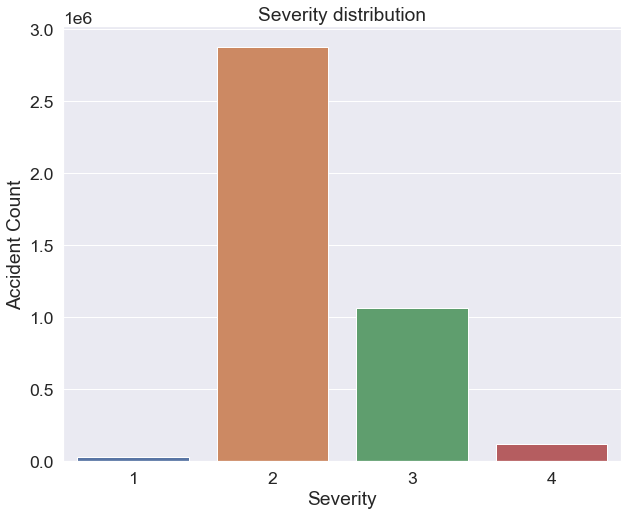

In [72]:
severity_counts = X["Severity"].value_counts()
print(severity_counts)
plt.figure(figsize=(10,8))
plt.title("Severity distribution")
sns.set(font_scale=0.8)
sns.barplot(severity_counts.index,severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Accident Count")
plt.show()

In [73]:
sample_size = len(X[X["Severity"]==1].value_counts())
df = pd.DataFrame()
for i in range(1,5):
    Sev_subset = X[X["Severity"]==i]
    df = df.append(Sev_subset.sample(sample_size, random_state=42))
X1 = df

1    26680
2    26680
3    26680
4    26680
Name: Severity, dtype: int64


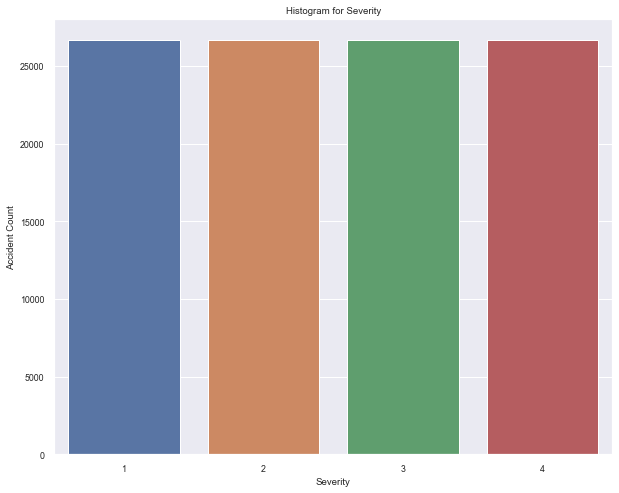

In [74]:
severity_counts = X1["Severity"].value_counts()
print(severity_counts)
plt.figure(figsize=(10,8))
plt.title("Histogram for Severity")
sns.barplot(severity_counts.index,severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Accident Count")
plt.show()

### SUMMARY 
- From the visualization section, the graph for Severity shows that the dataset is imbalanced. Severity 1 accidents are low in number where as severity 2 and 3 have high accident counts.
- We are doing random undersampling to get balanced data as we have huge dataset and up scaling might cause overfitting and significant time for modelling.
- We will be considering 26680 values from each of the severity buckets to ensure that there is sufficient and balanced data for all severity levels.


In [75]:
X1.to_csv("Cleaned_data.csv") # writing cleaned data to a file.

### n. Normalizing the dataset
 Finally, we will normalize the dataset

In [76]:
X_data = X1.drop(['Severity'],axis = 1) # dataset
Y_data = X1['Severity'] # target values 
print('X_data shape is : ',(X_data.shape))
print('Y_data shape is : ',(Y_data.shape))

X_data shape is :  (106720, 34)
Y_data shape is :  (106720,)


In [77]:
#X_data = X_data.set_index('time')
X_data.head()

TMC  Start_Lat  Start_Lng  Distance(mi)  Side   City  \
time                                                                          
2020-05-23 11:56:13  201.0   32.29520 -110.96100           0.0     1  11081   
2020-06-16 09:46:34  201.0   29.95923  -90.08497           0.0     0   7555   
2020-04-09 18:15:01  201.0   37.61079  -77.56365           0.0     1   4747   
2020-06-04 18:29:11  201.0   30.44074  -91.17801           0.0     1    594   
2020-06-18 17:53:28  201.0   41.32440  -81.73612           0.0     0   7812   

                     State  Temperature(F)  Humidity(%)  Pressure(in)  ...  \
time                                                                   ...   
2020-05-23 11:56:13      2            82.0         14.0         27.07  ...   
2020-06-16 09:46:34     16            88.0         59.0         30.11  ...   
2020-04-09 18:15:01     43            70.0         21.0         29.20  ...   
2020-06-04 18:29:11     16            87.0         53.0         29.80  ...   
2020-06-18 17:53:28     33            80.0         50.0         29.16  ...   

                     Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  \
time                                                                         
2020-05-23 11:56:13     0                0               1               0   
2020-06-16 09:46:34     0                0               0               0   
2020-04-09 18:15:01     0                0               0               0   
2020-06-04 18:29:11     0                0               0               0   
2020-06-18 17:53:28     0                0               0               0   

                     Year  Month  Day  Hour  Weekday  Time_Duration(min)  
time                                                                      
2020-05-23 11:56:13  2020      8   23    11        2                45.0  
2020-06-16 09:46:34  2020      6   16     9        5                15.0  
2020-04-09 18:15:01  2020      0    9    18        4                35.0  
2020-06-04 18:29:11  2020      6    4    18        4                15.0  
2020-06-18 17:53:28  2020      6   18    17        4                35.0  

[5 rows x 34 columns]

In [78]:
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

Xdata = pd.DataFrame(X_data)
Xdata.head()

0         1         2         3         4         5         6   \
0 -0.233146 -0.870470 -0.912094 -0.261304  0.464567  1.410266 -1.152915   
1 -0.233146 -1.344566  0.294073 -0.261304 -2.152544  0.397273 -0.246561   
2 -0.233146  0.208355  1.017525 -0.261304  0.464567 -0.409445  1.501408   
3 -0.233146 -1.246842  0.230920 -0.261304  0.464567 -1.602570 -0.246561   
4 -0.233146  0.962050  0.776450 -0.261304 -2.152544  0.471107  0.854012   

         7         8         9   ...        24        25        26        27  \
0  1.000993 -1.954564 -2.344928  ... -0.122311 -0.020539  1.990736 -0.641956   
1  1.323146 -0.136867  0.541310  ... -0.122311 -0.020539 -0.502327 -0.641956   
2  0.356685 -1.671811 -0.322663  ... -0.122311 -0.020539 -0.502327 -0.641956   
3  1.269454 -0.379226  0.246990  ... -0.122311 -0.020539 -0.502327 -0.641956   
4  0.893608 -0.500406 -0.360639  ... -0.122311 -0.020539 -0.502327 -0.641956   

         28        29        30        31        32        33  
0  0.952323  0.723560  0.798786 -0.262479 -0.491977 -0.029165  
1  0.952323  0.152036 -0.006523 -0.623163  0.898165 -0.034249  
2  0.952323 -1.562535 -0.811832  0.999914  0.434784 -0.030860  
3  0.952323  0.152036 -1.387053  0.999914  0.434784 -0.034249  
4  0.952323  0.152036  0.223565  0.819572  0.434784 -0.030860  

[5 rows x 34 columns]

# MODELLING

In [79]:
# splitting the dataset to train and test set 

X_train, X_test, y_train, y_test = train_test_split(Xdata, Y_data, test_size=0.2, random_state=42) # 80 % training set and 20% test set 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(85376, 34) (85376,)
(21344, 34) (21344,)


### a. Support Vector Machine 
SVM is a supervised machine learning algorithm which can be used for classification problems. 

In [80]:
svc = SVC(random_state=42) # using SVC model 
svc.get_params().keys() # getting the parameters

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [81]:
# Getting the best parameters using RandomizedSearchCV 

# uncomment the belwo section to get the best parameters 
'''
params = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [0.01, 0.1, 0.2, 0.5, 0.8, 1.0, 10],'class_weight' : [None, 'balanced', dict]}, {"kernel": ["poly"], "C": [0.01, 0.1, 0.2, 0.5, 0.8, 1.0, 10], "degree": [2, 3, 4],'class_weight' : [None, 'balanced', dict]}]

#using RandomizedSearchCV as GridsearchCV will be an exhaustive model for a huge dataset in terms or computation or memory. 

svc_randomsearch = RandomizedSearchCV(svc, param_distributions=params) # uses the deafult cv of 5 fold 

svc_randomsearch.fit(X_train ,y_train)
svc_randomsearch.best_params_

'''

'\nparams = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [0.01, 0.1, 0.2, 0.5, 0.8, 1.0, 10],\'class_weight\' : [None, \'balanced\', dict]}, {"kernel": ["poly"], "C": [0.01, 0.1, 0.2, 0.5, 0.8, 1.0, 10], "degree": [2, 3, 4],\'class_weight\' : [None, \'balanced\', dict]}]\n\n#using RandomizedSearchCV as GridsearchCV will be an exhaustive model for a huge dataset in terms or computation or memory. \n\nsvc_randomsearch = RandomizedSearchCV(svc, param_distributions=params) # uses the deafult cv of 5 fold \n\nsvc_randomsearch.fit(X_train ,y_train)\nsvc_randomsearch.best_params_\n\n'

In [82]:
import time
svc_data = SVC(kernel='rbf', class_weight='balanced', C=10) # RBF - Gaussian Radial basis function best paraemters obtained from previous step 

t_start_svm = time.time()
svc_data.fit(X_train, y_train)
y_pred = svc_data.predict(X_test)
t_end_svm = time.time()

print ("Time taken in seconds : ",t_end_svm-t_start_svm )


print("\nTraining set Score is: ",svc_data.score(X_train, y_train))
print("\nTesting set Score is: ",svc_data.score(X_test, y_test))


print("\nAccuracy is: ",accuracy_score(y_test,y_pred))

print("\nThe classification report\n")
print(classification_report(y_test,y_pred))


Time taken in seconds :  1540.3504059314728

Training set Score is:  0.763633808095952

Testing set Score is:  0.7040386056971514

Accuracy is:  0.7040386056971514

The classification report

              precision    recall  f1-score   support

           1       0.80      0.92      0.86      5376
           2       0.65      0.52      0.58      5378
           3       0.63      0.68      0.65      5328
           4       0.72      0.69      0.71      5262

    accuracy                           0.70     21344
   macro avg       0.70      0.70      0.70     21344
weighted avg       0.70      0.70      0.70     21344



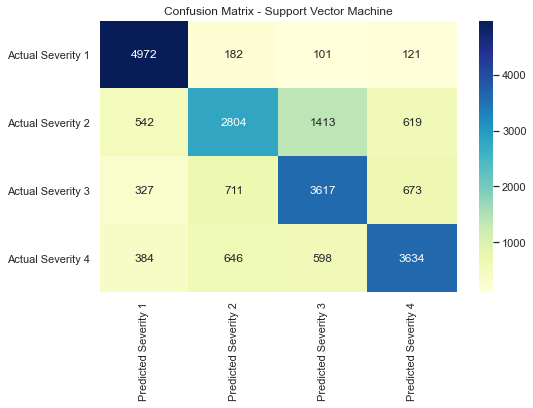

In [83]:
y_pred = svc_data.predict(X_test)
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=cfm, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

### SUMMARY

- Support Vector machine (SVM) is a supervised machine learning algorithm which can be used for classification problems.
- Here we are looking at predicting the severity of the accidents from 1 - 4. 
- We have used RandomizedSearchCV to get the best parameters to train the model keeping in mind the computational resources required. 
- With the best parameters, the SVM model gives us ~70% accuracy. The Confusion matrix also indicates that only ~50% of Severity 2 accident cases have been predicted accuractely with this model.
- Further training the dataset with the model is taking around ~25.66 minutes to complete. 

### b. Decision Tree
Tree classifiers can do a better job at classification for some datasets. They have a built in feature selection process. 

In [84]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.get_params().keys() # getting the parameters

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [85]:
# Getting the best parameters using RandomizedSearchCV 
# uncomment the belwo section to get the best parameters 
'''
from sklearn.model_selection import GridSearchCV
params = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]

dtc_randomsearch = GridSearchCV(dtc, params,n_jobs=-1, verbose = 5) # uses the deafult cv of 5 fold 

dtc_randomsearch.fit(X_train ,y_train)
dtc_randomsearch.best_params_

'''

'\nfrom sklearn.model_selection import GridSearchCV\nparams = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]\n\ndtc_randomsearch = GridSearchCV(dtc, params,n_jobs=-1, verbose = 5) # uses the deafult cv of 5 fold \n\ndtc_randomsearch.fit(X_train ,y_train)\ndtc_randomsearch.best_params_\n\n'

In [86]:
dtc_data = DecisionTreeClassifier(max_depth= 10, criterion= 'gini' ) 

t_start_dtc = time.time()
dtc_data.fit(X_train, y_train)
y_pred2 = dtc_data.predict(X_test)
t_end_dtc = time.time()

print ("Time taken in seconds : ",t_end_dtc-t_start_dtc )

print("Training set Score is: ",dtc_data.score(X_train, y_train))
print("Testing set Score is: ",dtc_data.score(X_test, y_test))


print("\nAccuracy is: ",accuracy_score(y_test,y_pred2))

print("\nThe classification report ")
print(classification_report(y_test,y_pred2))


Time taken in seconds :  0.900397777557373
Training set Score is:  0.779153392053973
Testing set Score is:  0.7597919790104948

Accuracy is:  0.7597919790104948

The classification report 
              precision    recall  f1-score   support

           1       0.86      0.93      0.90      5376
           2       0.73      0.54      0.62      5378
           3       0.68      0.70      0.69      5328
           4       0.75      0.86      0.80      5262

    accuracy                           0.76     21344
   macro avg       0.76      0.76      0.75     21344
weighted avg       0.76      0.76      0.75     21344



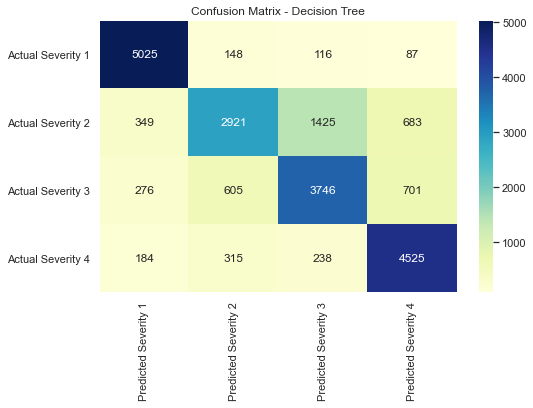

In [87]:
y_pred2 = dtc_data.predict(X_test)
cfm2 = confusion_matrix(y_true=y_test, y_pred=y_pred2)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix2 = pd.DataFrame(data=cfm2, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

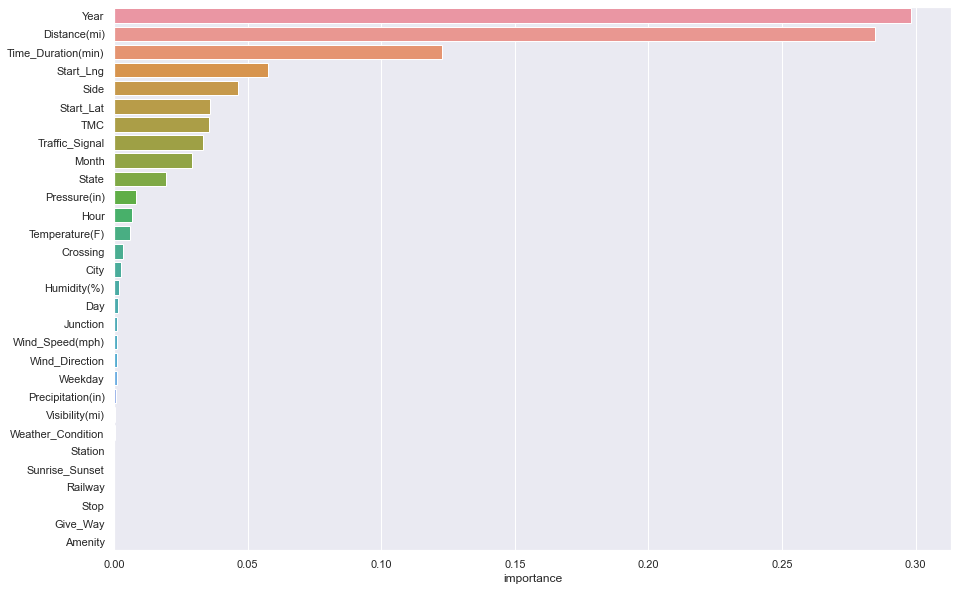

In [88]:
X2 = df
X2_data = X1.drop(['Severity'],axis = 1)
#X2_data = X2_data.set_index('time')

importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X2_data.columns)

importances.iloc[:,0] = dtc_data.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

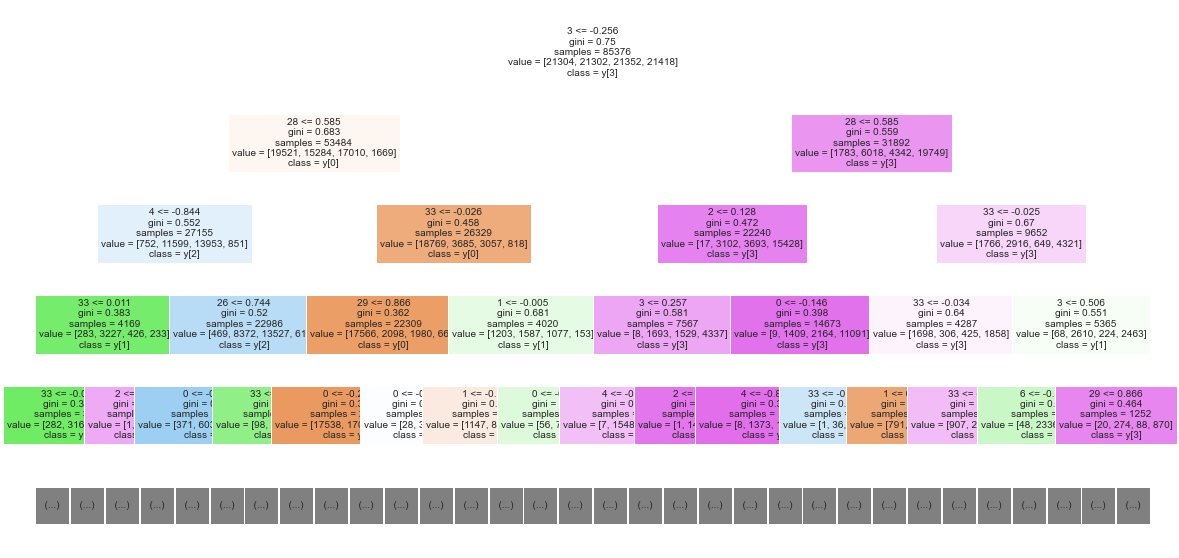

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc_data, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

### SUMMARY

- Decision Tree Classifier is a supervised machine learning algorithm which can be used for classification problems.It predicts a values by learning simple decision rules from the data features.
- Here we are looking at predicting the sevrity of the accidents from 1 - 4. We have used RandomizedSearchCV to get the best parameters to train the model. 

- With the best parameters, the Decision Tree Classifier model gives us ~75% accuracy and it takes less time than SVM . The Confusion matrix also indicates that only ~56% of Severity 2 accident cases have been predicted accurately with the model.

- Training the dataset with the model is taking around 0.9 seconds to complete. 

### c. Random Forest

In [90]:
rfc = RandomForestClassifier(random_state=42)
rfc.get_params().keys() # getting the parameters

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [91]:
# Getting the best parameters using RandomizedSearchCV 
# uncomment the belwo section to get the best parameters 

'''
params = [{"n_estimators": [50, 100, 200, 500,800], "max_depth": [5, 10, 15,20, 30],'max_features':[None,'auto','log2'],'min_samples_leaf':[1,2,3,4,5]}]

rfc_randomsearch = RandomizedSearchCV(rfc, param_distributions=params,n_jobs=-1, verbose = 5) # uses the default cv of 5 fold abd have verbose logging alomg with parallel threads 

rfc_randomsearch.fit(X_train ,y_train)
rfc_randomsearch.best_params_
'''

'\nparams = [{"n_estimators": [50, 100, 200, 500,800], "max_depth": [5, 10, 15,20, 30],\'max_features\':[None,\'auto\',\'log2\'],\'min_samples_leaf\':[1,2,3,4,5]}]\n\nrfc_randomsearch = RandomizedSearchCV(rfc, param_distributions=params,n_jobs=-1, verbose = 5) # uses the default cv of 5 fold abd have verbose logging alomg with parallel threads \n\nrfc_randomsearch.fit(X_train ,y_train)\nrfc_randomsearch.best_params_\n'

In [92]:
#rfc_data = RandomForestClassifier(n_estimators= 500, max_depth= 15, max_features=None, min_samples_leaf=3) 
rfc_data = RandomForestClassifier(n_estimators= 500, max_depth= 15, max_features=None, min_samples_leaf=5) 
t_start_rfc = time.time()
rfc_data.fit(X_train, y_train)
y_pred3 = rfc_data.predict(X_test)
t_end_rfc = time.time()

print ("Time taken in seconds : ",t_end_rfc-t_start_rfc )


print("Training set Score is: ",rfc_data.score(X_train, y_train))
print("Testing set Score is: ",rfc_data.score(X_test, y_test))


print("\nAccuracy is: ",accuracy_score(y_test,y_pred3))

print("\nThe classification report ")
print(classification_report(y_test,y_pred3))

Time taken in seconds :  361.9612030982971
Training set Score is:  0.8534951274362819
Testing set Score is:  0.7991941529235382

Accuracy is:  0.7991941529235382

The classification report 
              precision    recall  f1-score   support

           1       0.92      0.94      0.93      5376
           2       0.77      0.63      0.69      5378
           3       0.73      0.73      0.73      5328
           4       0.78      0.90      0.83      5262

    accuracy                           0.80     21344
   macro avg       0.80      0.80      0.80     21344
weighted avg       0.80      0.80      0.80     21344



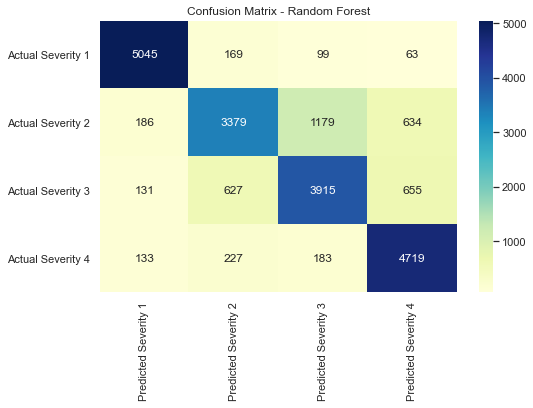

In [93]:
y_pred3 = rfc_data.predict(X_test)
cfm3 = confusion_matrix(y_true=y_test, y_pred=y_pred3)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix3 = pd.DataFrame(data=cfm3, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

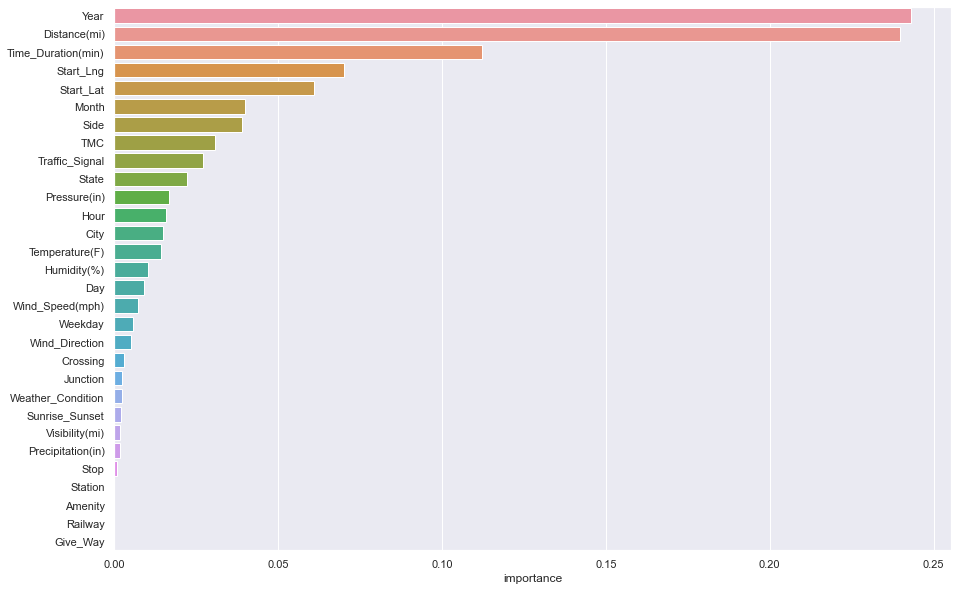

In [94]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X2_data.columns)

importances.iloc[:,0] = rfc_data.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

### SUMMARY

- Random Forest Classifier is a supervised machine learning algorithm which can be used for classification problems.It create a set of decision trees and predictions from all trees are polled to make the final prediction.
- Here we are again looking at predicting the sevreity of the accidents from 1 - 4.  We have used RandomizedSearchCV to get the best parameters to train the model. 

- With the best parameters, the Random Forest Classifier model gives us ~79% accuracy but it take sligtly more time than decision tree classifier and lesser than SVM model. The Confusion matrix also indicates that only ~63% of Severity 2 accident cases have been predicted accurately with the model which is the best prediction so far with the models considered. Other Severities are also predicted more accurately compared to previous SVM or decision tree modeling.

- Training the dataset with the model is taking around 6 minutes to complete. 

### d. Neural Networks -  MLP ( MultiLayer Percptron) 

In [95]:
mlp = MLPClassifier(random_state=42)
mlp.get_params().keys() # getting the parameters

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [96]:
# Getting the best parameters using RandomizedSearchCV 
# We will be using solver adam as it works relatively well on large datasets according to sklearn documentation 
# additionally considering max_iter 200 for computation purpose 
# keeping the other parametrs as default values and checking the best parametser for hidden layer sizes and alpha regularization parameter

# uncomment the belwo section to get the best parameters 
'''
params = [{"hidden_layer_sizes": [(20,20,20) , (32,64,32) ,(32,64 )], "alpha": [0.0001, 0.01, 0.1, 1], "solver" :['adam','sgd']}]

mlp_randomsearch = RandomizedSearchCV(mlp, param_distributions=params, n_jobs=-1, verbose = 5) # uses the default cv of 5 fold abd have verbose logging alomg with parallel threads 

mlp_randomsearch.fit(X_train ,y_train)
mlp_randomsearch.best_params_
'''

'\nparams = [{"hidden_layer_sizes": [(20,20,20) , (32,64,32) ,(32,64 )], "alpha": [0.0001, 0.01, 0.1, 1], "solver" :[\'adam\',\'sgd\']}]\n\nmlp_randomsearch = RandomizedSearchCV(mlp, param_distributions=params, n_jobs=-1, verbose = 5) # uses the default cv of 5 fold abd have verbose logging alomg with parallel threads \n\nmlp_randomsearch.fit(X_train ,y_train)\nmlp_randomsearch.best_params_\n'

In [97]:
#mlp_data = MLPClassifier(hidden_layer_sizes=(32, 64), max_iter= 200, solver='adam',alpha= 0.0001) 
mlp_data = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter= 200, solver='adam',alpha= 0.1) 
t_start_mlp = time.time()
mlp_data.fit(X_train, y_train)
y_pred4 = mlp_data.predict(X_test)
t_end_mlp = time.time()

print ("Time taken in seconds : ",t_end_mlp-t_start_mlp )

print("Training set Score is: ",mlp_data.score(X_train, y_train))
print("Testing set Score is: ",mlp_data.score(X_test, y_test))



print("\nAccuracy is: ",accuracy_score(y_test,y_pred4))

print("\nThe classification report ")
print(classification_report(y_test,y_pred4))

Time taken in seconds :  67.5552351474762
Training set Score is:  0.7553293665667167
Testing set Score is:  0.7530453523238381

Accuracy is:  0.7530453523238381

The classification report 
              precision    recall  f1-score   support

           1       0.87      0.93      0.90      5376
           2       0.71      0.56      0.63      5378
           3       0.68      0.69      0.69      5328
           4       0.73      0.83      0.78      5262

    accuracy                           0.75     21344
   macro avg       0.75      0.75      0.75     21344
weighted avg       0.75      0.75      0.75     21344



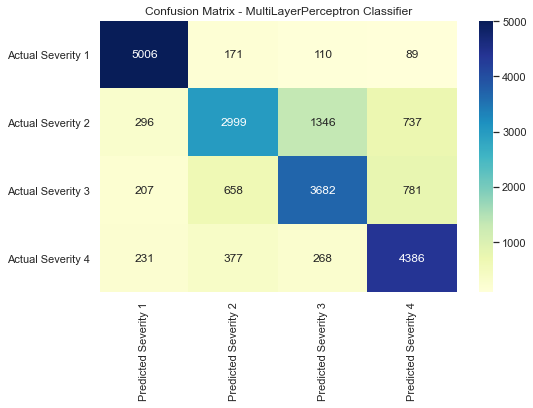

In [98]:
y_pred4 = mlp_data.predict(X_test)

cfm4 = confusion_matrix(y_true=y_test, y_pred=y_pred4)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix4 = pd.DataFrame(data=cfm4, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - MultiLayerPerceptron Classifier")
plt.show()

### SUMMARY

- MultiLayer Perceptron Classifier is a type of Neural network which can be used for classification problems.It comprises of one or more layers or neurons which is the hidden layer. 
- Here we are again looking at predicting the sevreity of the accidents from 1 - 4.  We have used RandomizedSearchCV to get the best parameters to train the model. 

- With the best parameters, the MLP Classifier model gives us ~75% accuracy and it take more time than random forest classifier and lesser than SVM model. The Confusion matrix also indicates that only ~59% of Severity 2 accident cases have been predicted accurately with the model.

- Further training the dataset with the model is taking around 1.1 minutes to complete. 

# RESULTS

Accuracy for each model comparision and conclusing which fits best 

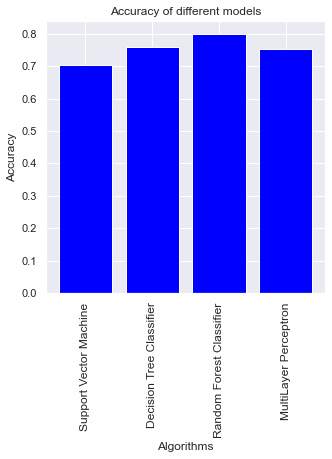

In [100]:
Accuracy = [0.7040386056971514, 0.7597919790104948 , 0.7991941529235382, 0.7530453523238381]
Algos = ['Support Vector Machine','Decision Tree Classifier','Random Forest Classifier', 'MultiLayer Perceptron']
plt.figure(figsize=(5,5))
plt.title('Accuracy of different models')
plt.bar(Algos,Accuracy, color='Blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation='vertical', size=12)
plt.show()

# CONCLUSION

- The data visualization helped to understand the top states and cities with maximum accidents reported, the timings when most of the accidents are reported along with the days in the week when the accidents were reported. We observed that California state and Huston city in Texas state had the most accidents reported. Most of the accidents are reported on weekdays during peak hours and we also see an increase in the accidents count  towards the end of the year. Additionally, we were able to identify that there was an increase in the number of accidents year on year from 2016 - 2020. Most of the accidents were reported near a traffic signal, junction or crossing. This helps in having the authorities to be prepared for impacts of accidents that might occur in the states and also minimise the impacts.
- Data cleaning, preprocessing and feature engineering helped to identify the factors required for predicting the severity of the accidents.
- The dataset was divided into 80% training dataset and 20% test set to ensure that there is sufficient data for testing and the model is not memorizing all the data.
- To summarize, from the models we see that Random Forest Classifier has performed better than other models in terms of accuracy for a multiclass classification and an accuracy of ~79% was achieved.
- The hyperparameters can be tuned further to see if the accuracy can further be improved.
- We also saw that the accidents reported were on a clear or fair day indicating that most of the accidents were not affected by the weather conditions. As we proceed further we can think of combining datasets with accident reports and the driver details, and other conditions to understand more about the human factors leading to the accidents.
- Another drawback with the severity in this dataset is that there is no clear cut definition for severity of an accident. The severity here talks about the time it takes for the traffic to clear when accidents happen. Some accidents reported as severity 2 might not be reported as severity 2 by other sources or even not the same severity in real scenarios.
- So to develop on the dataset further, severity definitions can be set to differentiate the severities clearly and appropriately train the models.

